In [1]:
from src import pd
from src import plt
from src import sns
from src import np

from src import train_test_split
from src import cross_val_score
from src import Counter


In [2]:
# 1. import data

raw_df = pd.read_csv('./datasets/Telco_customers.csv')


In [3]:
# Dataset Attributes


# customerID - Customer ID

# gender - Customer is a male or a female

# SeniorCitizen - Customer is a senior citizen(1, 0)

# Partner - Customer has a partner(Yes, No)

# Dependents - Customer has dependents(Yes, No)

# tenure - Number of months the customer has stayed with the company

# PhoneService - Customer has a phone service(Yes, No)

# MultipleLines - Customer has multiple lines(Yes, No, No phone service)

# InternetService - Customer’s internet service provider(DSL, Fiber optic, No)

# OnlineSecurity - Customer has online security(Yes, No, No internet service)

# OnlineBackup - Customer has online backup or not (Yes, No, No internet service)

# DeviceProtection - Customer has device protection(Yes, No, No internet service)

# TechSupport - Customer has tech support(Yes, No, No internet service)

# StreamingTV - Customer has streaming TV service(Yes, No, No internet service)

# StreamingMovies - Customer has streaming movies service(Yes, No, No internet service)

# Contract - Indicates the type of the contract(Month-to-month, One year, Two year)

# PaperlessBilling - Customer has paperless billing(Yes, No)

# PaymentMethod - Indicates the payment method(Electronic check, Mailed check, Bank transfer(automatic), Credit card(automatic))

# MonthlyCharges - Indicates the current monthly subscription cost of the customer

# TotalCharges - Indicates the total charges paid by the customer so far

# Churn - Indicates Customer churned


In [4]:
# 2 | exploring dataset

raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:

raw_df.shape


(7043, 21)

In [6]:

raw_df.describe().T


count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [7]:

raw_df.head()


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [8]:
# Data types 

raw_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:

#! 2. EDA  

df_eda = raw_df.copy(deep=True)


In [10]:
# # get location (position number) of TotalCharges column in dataframe
# df_eda.columns.get_loc('TotalCharges')


In [11]:
# We can see from dtypes and from table head above that the TotalCharges variable data type is not correct, it's actually, numerical variable
# and SeniorCitizen data type is not correct also. So we need to change it's data type to categoric

# ! v1
# We can change data types in here (before eda visualization) or after eda visualization

# df_eda['TotalCharges'] = df_eda.TotalCharges.astype('float') # bu xeta verir cunki daxilinde text value var ici bos olan, onu silmek lazimdir, lakin birbasa silmek olmur deye yerini tapib, hemin index-li value-lari silek


# v 111
# len_total_charges = [len(i) <= 1 for i in df_eda.TotalCharges]

# nulls_loc = []

# for i, d in enumerate(len_total_charges):
#     if d == True:
#         nulls_loc.append(i)

# nulls_loc


# v 111  drop=True => dropping rows with no values in 'Total_charges'
# df_eda = df_eda.drop(nulls_loc, axis=0).reset_index(drop=True)

# v 222
# X_test = X_test.drop(index=nulls_loc, axis=0).reset_index()
# X_test.drop('index', axis=1, inplace=True)


# v 333
# replace null values with median value of totalcharges

loc_na = df_eda['TotalCharges'] == ' '

# get the copy of the dataframe that does not contain null values
temp_df = df_eda.loc[~loc_na].copy()
# convert data type to float
temp_df['TotalCharges'] = temp_df['TotalCharges'].astype('float')

# replace null values on it's location with median value of totalcharges
# loc => first parameter is row numbers and second is column names
df_eda.loc[loc_na, 'TotalCharges'] = np.median(temp_df['TotalCharges'])


# v111, v222, v333
# aftere replacing null(NA values , ' ') with the median value (float), we can change the TotalCharges data type without getting an error
df_eda['TotalCharges'] = df_eda.TotalCharges.astype('float')



df_eda['SeniorCitizen'] = df_eda.SeniorCitizen.astype('object')

# after changing data types, we can print
df_eda.dtypes


customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:

# # # ! v2 
# # directly change data type in raw data

# # we don't need this feature/column 
# # # raw_df = raw_df.drop(['customerID'], axis=1)

# raw_df['SeniorCitizen'] = raw_df.SeniorCitizen.astype('object')
# # # raw_df['TotalCharges'] = raw_df.TotalCharges.astype('float') # error

# # fix error, then change data type:
# len_total_charges = [len(i) <= 1 for i in raw_df.TotalCharges]

# nulls_loc = []

# for i, d in enumerate(len_total_charges):
#     if d == True:
#         nulls_loc.append(i)

# # nulls_loc

# raw_df = raw_df.drop(nulls_loc, axis=0).reset_index(drop=True)


# raw_df['TotalCharges'] = raw_df.TotalCharges.astype('float')


In [13]:

# # !v2
# raw_df.dtypes

In [14]:

# # !v2 

# df_eda = raw_df.copy(deep=True)


In [15]:
# Creating numerical and categorical lists

# list of all columns in dataframe
all_cols = list(df_eda.dtypes.index)
all_cols

numerical_cols = list(df_eda.select_dtypes([int, float]))


# categorical columns // we can get all categorical columns by deleting numeric columns list from dataframe
# axis = 1  ===> means that:  columns;  axis = 0 ===> means that:  rows
categorical_cols = list(df_eda.drop(numerical_cols, axis=1))
categorical_cols


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [16]:
# as we see from dataframe, null (NA) values are replaced with median value of the TotalCharges feature

df_eda[loc_na]

customerID  gender SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female             0     Yes        Yes       0   
753   3115-CZMZD    Male             0      No        Yes       0   
936   5709-LVOEQ  Female             0     Yes        Yes       0   
1082  4367-NUYAO    Male             0     Yes        Yes       0   
1340  1371-DWPAZ  Female             0     Yes        Yes       0   
3331  7644-OMVMY    Male             0     Yes        Yes       0   
3826  3213-VVOLG    Male             0     Yes        Yes       0   
4380  2520-SGTTA  Female             0     Yes        Yes       0   
5218  2923-ARZLG    Male             0     Yes        Yes       0   
6670  4075-WKNIU  Female             0     Yes        Yes       0   
6754  2775-SEFEE    Male             0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55      1397.475     No  
753                Mailed check          20.25      1397.475     No  
936                Mailed check          80.85      1397.475     No  
1082               Mailed check          25.75      1397.475     No  
1340    Credit card (automatic)          56.05      1397.475     No  
3331               Mailed check          19.85      1397.475     No  
3826               Mailed check          25.35      1397.475     No  
4380               Mailed check          20.00      1397.475     No  
5218               Mailed check          19.70  

In [17]:
# label encoding

# Label Encoding refers to converting the labels into a numeric form.
# This is only for EDA reasons. Later we will use OneHotEncoder to prepare for model building.

from src import LabelEncoder



labelEnc = LabelEncoder()

df_eda[categorical_cols] = df_eda[categorical_cols].apply(labelEnc.fit_transform)

# df_eda[['Churn']] = df_eda[['Churn']].apply(labelEnc.fit_transform)


In [18]:
df_eda.dtypes

customerID            int32
gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [19]:
# label encoding is best if there is an ordinal relationship between categories,
# one-hot encoding is best if there is no ordinal relationship between categories,
# binary encoding is best if there are weak ordinal relationships between categories


# T ===> transpose matrix (change row to column position)

df_eda[categorical_cols].describe().T


count         mean          std  min     25%     50%  \
customerID        7043.0  3521.000000  2033.283305  0.0  1760.5  3521.0   
gender            7043.0     0.504756     0.500013  0.0     0.0     1.0   
SeniorCitizen     7043.0     0.162147     0.368612  0.0     0.0     0.0   
Partner           7043.0     0.483033     0.499748  0.0     0.0     0.0   
Dependents        7043.0     0.299588     0.458110  0.0     0.0     0.0   
PhoneService      7043.0     0.903166     0.295752  0.0     1.0     1.0   
MultipleLines     7043.0     0.940508     0.948554  0.0     0.0     1.0   
InternetService   7043.0     0.872923     0.737796  0.0     0.0     1.0   
OnlineSecurity    7043.0     0.790004     0.859848  0.0     0.0     1.0   
OnlineBackup      7043.0     0.906432     0.880162  0.0     0.0     1.0   
DeviceProtection  7043.0     0.904444     0.879949  0.0     0.0     1.0   
TechSupport       7043.0     0.797104     0.861551  0.0     0.0     1.0   
StreamingTV       7043.0     0.985376     0.885002  0.0     0.0     1.0   
StreamingMovies   7043.0     0.992475     0.885091  0.0     0.0     1.0   
Contract          7043.0     0.690473     0.833755  0.0     0.0     0.0   
PaperlessBilling  7043.0     0.592219     0.491457  0.0     0.0     1.0   
PaymentMethod     7043.0     1.574329     1.068104  0.0     1.0     2.0   
Churn             7043.0     0.265370     0.441561  0.0     0.0     0.0   

                     75%     max  
customerID        5281.5  7042.0  
gender               1.0     1.0  
SeniorCitizen        0.0     1.0  
Partner              1.0     1.0  
Dependents           1.0     1.0  
PhoneService         1.0     1.0  
MultipleLines        2.0     2.0  
InternetService      1.0     2.0  
OnlineSecurity       2.0     2.0  
OnlineBackup         2.0     2.0  
DeviceProtection     2.0     2.0  
TechSupport          2.0     2.0  
StreamingTV          2.0     2.0  
StreamingMovies      2.0     2.0  
Contract             1.0     2.0  
PaperlessBilling     1.0     1.0  
PaymentMethod        2.0     3.0  
Churn                1.0     1.0

In [20]:
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [21]:
# label encoding is best if there is an ordinal relationship between categories,
# one-hot encoding is best if there is no ordinal relationship between categories,
# binary encoding is best if there are weak ordinal relationships between categories


# T ===> transpose matrix (change row to column position)

df_eda[numerical_cols].describe().T


count         mean          std    min      25%       50%  \
tenure          7043.0    32.371149    24.559481   0.00    9.000    29.000   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.500    70.350   
TotalCharges    7043.0  2281.916928  2265.270398  18.80  402.225  1397.475   

                    75%      max  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80

In [22]:
# Colors

palette = ['#008080', '#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']


In [23]:
df_eda[numerical_cols]

tenure  MonthlyCharges  TotalCharges
0          1           29.85         29.85
1         34           56.95       1889.50
2          2           53.85        108.15
3         45           42.30       1840.75
4          2           70.70        151.65
...      ...             ...           ...
7038      24           84.80       1990.50
7039      72          103.20       7362.90
7040      11           29.60        346.45
7041       4           74.40        306.60
7042      66          105.65       6844.50

[7043 rows x 3 columns]

Rows count:  6 
Cols count:  3


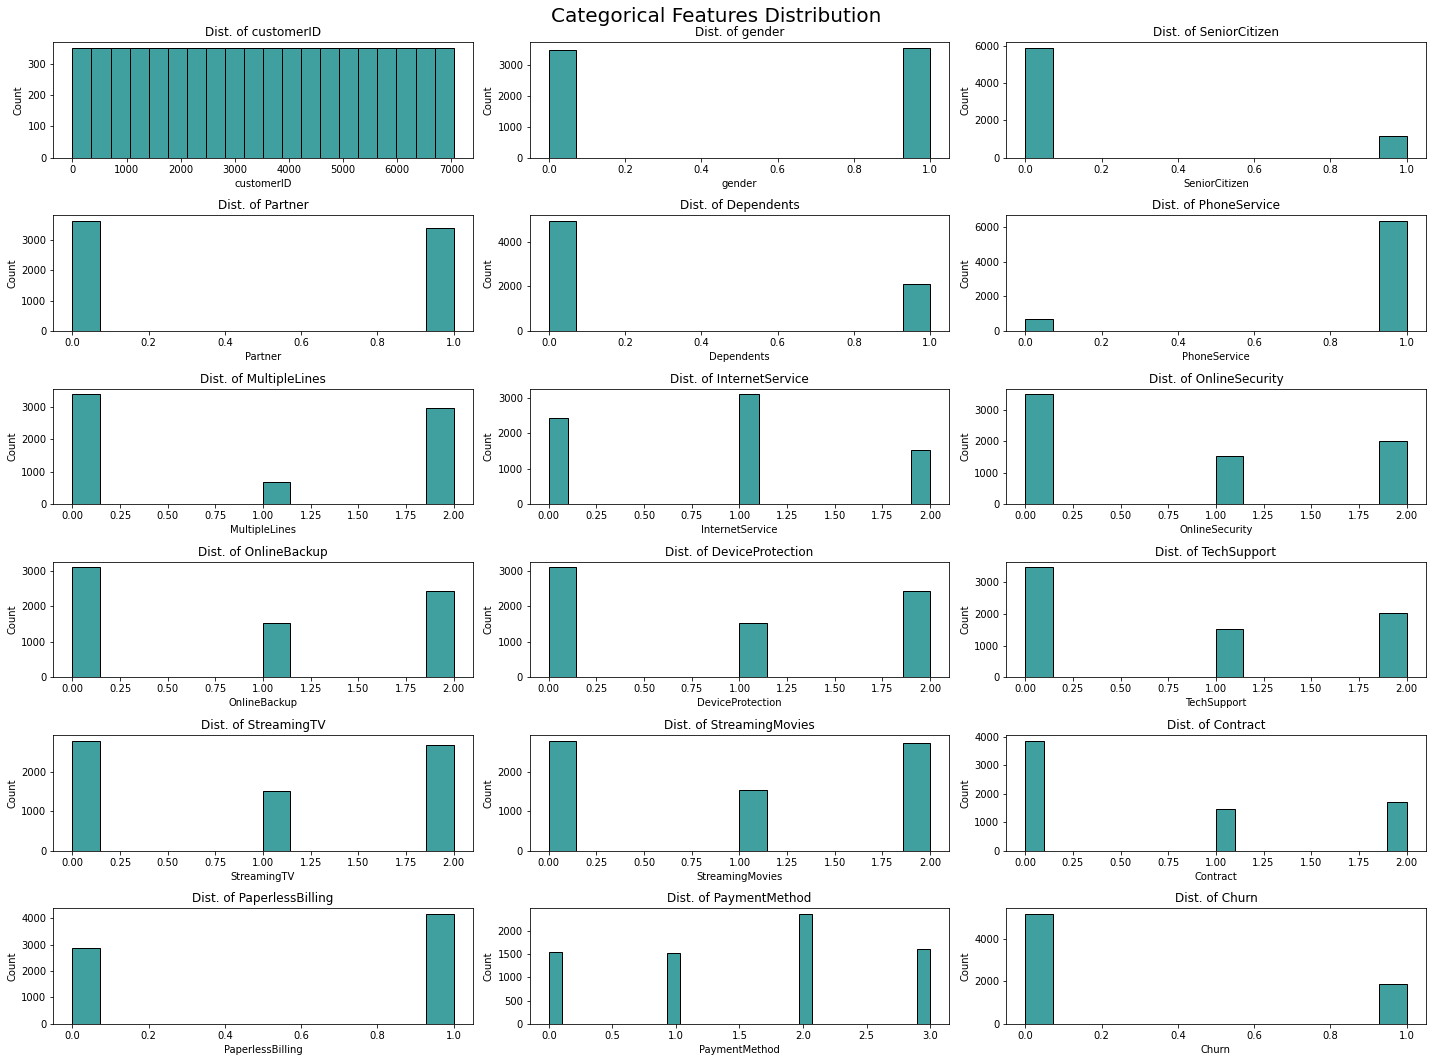

In [24]:
# 2.2 EDA | visualization

# categorical features/columns distribution after label encoding

from src.visualizations import categoric_hist_visualization

rows = int(np.ceil(len(categorical_cols) / 3))
cols = 3
print("Rows count: ", rows, "\nCols count: ", cols)

palette = ['#008080', '#FF6347', '#E50000', '#D2691E']


# def categoric_hist_visualization(data, rows, cols, cols_list):
#     fig, axs = plt.subplots(
#         rows,
#         cols,
#         figsize=(20, 15)
#     )

#     fig.suptitle('Categorical Features Distribution', size=20)

#     for id, col in enumerate(cols_list):
#         # plt.subplot(int(np.ceil(id / 3)), int(id % 3), id)

#         sns.histplot(
#             data=data[col],
#             ax=axs[id // cols][id % cols],
#             # bin size  //  show how many data on each bin size (y axis - count)
#             # bins=2,
#             # kde=True,
#             # kde_kws=s{'bw_method': 0.1},
#             color=palette[0],
#         )

#         axs[id // cols][id % cols].set_title(f'Dist. of {col}')



categoric_hist_visualization(data=df_eda,
                   rows=rows,
                   cols=3,
                   cols_list=categorical_cols)


plt.tight_layout()


In [25]:

# # ! v3
# # we can see from above distribution and data types that TotalCharges is not categorical variable
# # and CustomerId is not categorical variable also, but we can see it's constant variable, and actually we don't need this variable

# # for this reason, we need to add to the numeric column list
# numerical_cols.append('TotalCharges')
# categorical_cols.remove('TotalCharges')
categorical_cols.remove('customerID')
# # raw_df.drop('customerID', axis=1, inplace=True) # we can also drop from raw_df data, as we already know that we don't need this variable; or we can do it later

# # as we can see, SeniorCitizen is categorical variable, we need to change data type in here, otherwise we have to change it later
# # numerical_cols.remove('SeniorCitizen')
# # raw_df['SeniorCitizen'] = raw_df['SeniorCitizen'].astype('object')

numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [26]:
categorical_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [27]:
# allmost all of the encoded categories are not normally distributed
# they are bimodal or skewed
# only internetService is somehow normally distributed

['tenure', 'MonthlyCharges', 'TotalCharges']


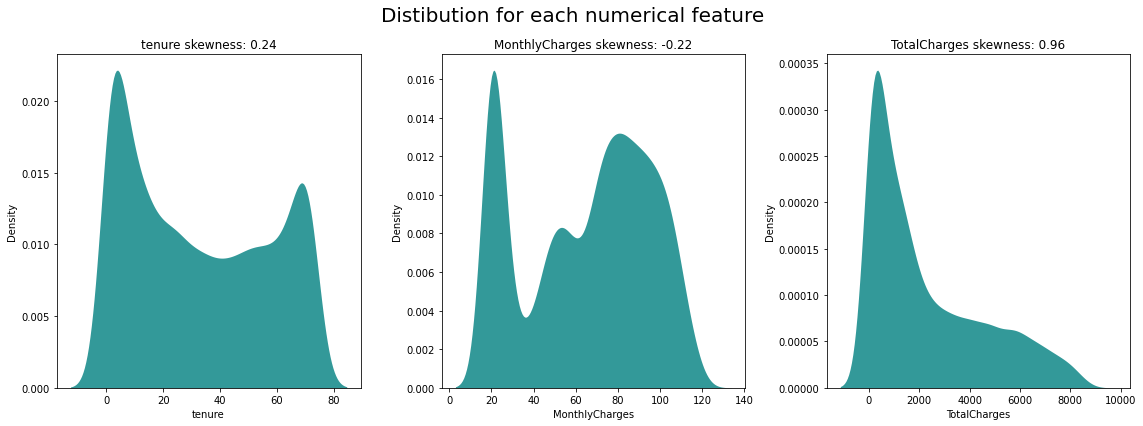

In [28]:

# Checking for distributions

from src.visualizations import numeric_kde_visualization

# def numeric_kde_visualization(data, cols_list, cols_c, rows_c, supTitle):
#     fig, axs = plt.subplots(
#         # data=data,
#         nrows=rows_c,
#         ncols=cols_c,
#         figsize=(16, 6)
#     )

#     # seting figure title
#     fig.suptitle(supTitle, size=20)

#     # plot for each given column in data
#     for i, col in enumerate(cols_list):
#         sns.kdeplot(
#             data=data[col],
#             ax=axs[i],
#             fill=True,  # fill inside
#             alpha=0.8,  # transparency level
#             linewidth=0,
#             color='#008080'
#         )

#         axs[i].set_title(
#             f'{col} skewness: ' + str(
#                 round((data[col].skew(axis=0, skipna=True)), 2)
#             ))


# calling plot function
numeric_kde_visualization(data=df_eda,
             cols_list=numerical_cols,
             rows_c=1,
             cols_c=len(numerical_cols),
             supTitle='Distibution for each numerical feature')

plt.tight_layout()  # ???

print(numerical_cols)


In [29]:

# # ! v4
# # also there is some anomalies in SeniorCitizen variable, in data types it is numeric variable
# # but actually, it should be categorical variable (with 2 categories)

# numerical_cols.remove('SeniorCitizen')
# categorical_cols.append('SeniorCitizen')
# numerical_cols

In [30]:
categorical_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [31]:

# # ! v4
# # if we distribute again, now it's correct

# numeric_kde_visualization(data=df_eda,
#              cols_list=numerical_cols,
#              rows_c=1,
#              cols_c=len(numerical_cols),
#              supTitle='Distibution for each numerical feature')


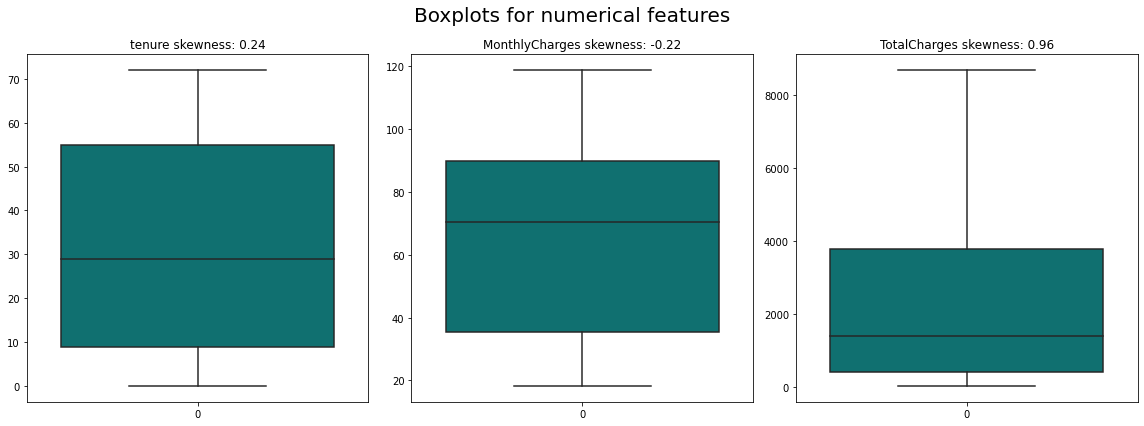

In [32]:
# boxplot distribution

from src.visualizations import numeric_boxplot_distribution

# def numeric_boxplot_distribution(data, cols_list, cols_c, rows_c, supTitle):
#     fig, axs = plt.subplots(
#         # data=data,
#         nrows=rows_c,
#         ncols=cols_c,
#         # sharey=True, # share y axis ticks
#         figsize=(16, 6)
#     )

#     # seting figure title
#     fig.suptitle(supTitle, size=20)

#     # plot for each given column in data
#     for i, col in enumerate(cols_list):
#         sns.boxplot(
#             data=data[col],
#             ax=axs[i],
#             # orient='h',
#             palette=palette
#         )

#         axs[i].set_title(
#             f'{col} skewness: ' + str(
#                 round((data[col].skew(axis=0, skipna=True)), 2)
#             ))


# calling plot function
numeric_boxplot_distribution(data=df_eda,
             cols_list=numerical_cols,
             rows_c=1,
             cols_c=3,
             supTitle='Boxplots for numerical features')

plt.tight_layout()  #


In [33]:
# Conclusions: (numeric)

# variables are not normally distributed;
# tenure and MonthlyCharges created kind of a bimodal distribution;
# TotalCharges is not normal distributed and it's data somehow unique/constant, we need to look this data again
# there is no outliers, but we will chack it


In [34]:
df_eda[categorical_cols]

gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0          0              0        1           0             0              1   
1          1              0        0           0             1              0   
2          1              0        0           0             1              0   
3          1              0        0           0             0              1   
4          0              0        0           0             1              0   
...      ...            ...      ...         ...           ...            ...   
7038       1              0        1           1             1              2   
7039       0              0        1           1             1              2   
7040       0              0        1           1             0              1   
7041       1              1        1           0             1              2   
7042       1              0        0           0             1              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                   0               0             2                 0   
1                   0               2             0                 2   
2                   0               2             2                 0   
3                   0               2             0                 2   
4                   1               0             0                 0   
...               ...             ...           ...               ...   
7038                0               2             0                 2   
7039                1               0             2                 2   
7040                0               2             0                 0   
7041                1               0             0                 0   
7042                1               2             0                 2   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0            0                0         0                 1   
1               0            0                0         1                 0   
2               0            0                0         0                 1   
3               2            0                0         1                 0   
4               0            0                0         0                 1   
...           ...          ...              ...       ...               ...   
7038            2            2                2         1                 1   
7039            0            2                2         1                 1   
7040            0            0                0         0                 1   
7041            0            0                0         0                 1   
7042            2            2                2         2                 1   

      PaymentMethod  Churn  
0                 2      0  
1                 3      0  
2                 3      1  
3                 0      0  
4                 2      1  
...             ...    ...  
7038              3      0  
7039              1      0  
7040              2      0  
7041              3      1  
7042              0      0  

[7043 rows x 17 columns]

In [35]:
#  Checking for outliers - Inter Quartile Range (IQR)

from src.helpers import outliers_iqr

# outliers = []

# def get_outliers_iqr(df, n, features):
#     for col in features:
#         q1 = np.percentile(df[col], 25)
#         # q2 = np.percentile(df[col], 50) # median
#         q3 = np.percentile(df[col], 75)

#         iqr = q3 - q1  # IQR

#         outliers_list_cols = df[
#             (df[col] > q3 + (iqr * 1.5)) | (df[col] < q1 - (iqr * 1.5))
#         ].index

#         # extend adds new list values to existing list # instead append add new list itself to existing list
#         outliers.extend(outliers_list_cols)

#     # selecting observations containing more than x outliers
#     outlier_list = Counter(outliers)
#     outliers_n = list(k for k, v in outlier_list.items() if v > n)
#     # all_outliers

#     lower_b_out = df[df[col] < q1 - (iqr * 1.5)]
#     upper_b_out = df[df[col] > q3 + (iqr * 1.5)]
#     total_outliers_shape = lower_b_out.shape[0] + upper_b_out.shape[0]

#     print('Total number of outliers is:', total_outliers_shape)

#     return outliers_n

# all_outliers = get_outliers_iqr(df_eda, 1, (numerical_cols))


outliers_iqr(df_eda, 1, numerical_cols)


# even if we drop the outliers there will nothing be changed in the dataset
# df_out = df_eda.drop(all_outliers, axis=0).reset_index(drop=True)


Total number of outliers is: 0


In [36]:

# as we can see, there is no outliers in the dataset

Text(0.5, 1.0, 'Distribution of Total Charges by Churn')

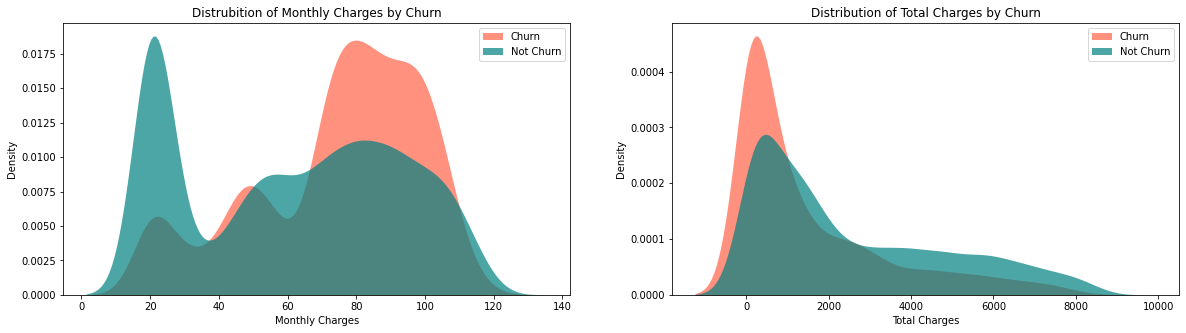

In [37]:
# Our target variable is Churn

# Numerical Features vs Target Variable (Churn)

fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# density plots (traditional way)

plt.subplot(1, 2, 1)
ax = sns.kdeplot(
    df_eda.MonthlyCharges[df_eda.Churn == 1],
    color=palette[1],
    fill=True,
    alpha=.7,
    linewidth=0
)

ax = sns.kdeplot(
    df_eda.MonthlyCharges[df_eda.Churn == 0],
    color=palette[0],
    fill=True,
    alpha=.7,
    linewidth=0
)

ax.legend(["Churn", "Not Churn"])
ax.set_xlabel("Monthly Charges")
ax.set_title("Distrubition of Monthly Charges by Churn")

plt.subplot(1, 2, 2)
ax = sns.kdeplot(
    df_eda.TotalCharges[df_eda.Churn == 1],
    color=palette[1],
    fill=True,
    alpha=.7,
    linewidth=0
)

ax = sns.kdeplot(
    df_eda.TotalCharges[df_eda.Churn == 0],
    color=palette[0],
    fill=True,
    alpha=.7,
    linewidth=0
)

ax.legend(["Churn", "Not Churn"])
ax.set_xlabel("Total Charges")
ax.set_title('Distribution of Total Charges by Churn')


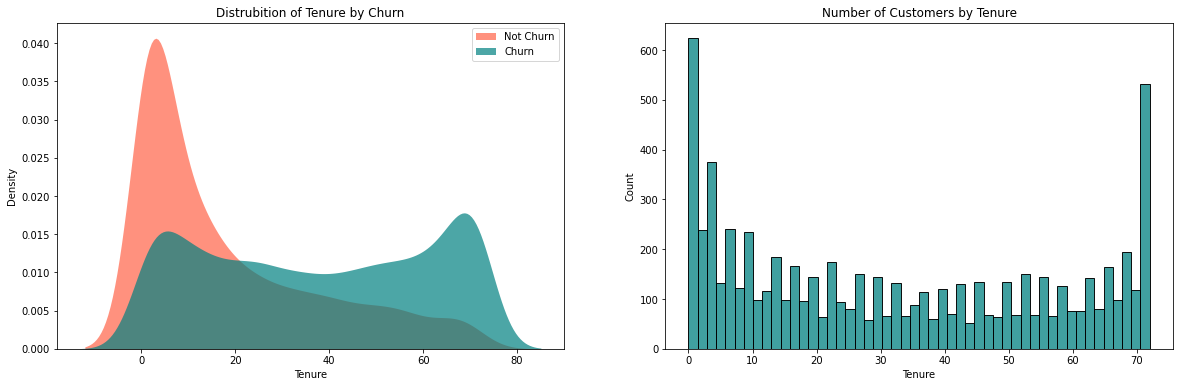

In [38]:
fig = plt.subplots(1, 2, figsize=(20, 6))


plt.subplot(1, 2, 1)

ax = sns.kdeplot(
    # select tenure column values where churn is 1 (customer churns)
    df_eda.tenure[df_eda.Churn == 1],
    color=palette[1],
    fill=True,
    alpha=.7,
    linewidth=0
)

ax = sns.kdeplot(
    # select tenure column values where churn is 0 (not churn)
    df_eda.tenure[df_eda.Churn == 0],
    color=palette[0],
    fill=True,
    alpha=.7,
    linewidth=0
)

ax.legend(["Not Churn", "Churn"])
ax.set_xlabel("Tenure")
ax.set_title("Distrubition of Tenure by Churn")


plt.subplot(1, 2, 2)

ax = sns.histplot(
    df_eda.tenure,
    # bin size  //  show how many data on each bin size (y axis - count)
    bins=50,
    # kde=False,
    color=palette[0],
)

ax.set_xlabel("Tenure")
ax.set_title("Number of Customers by Tenure")

plt.show()


In [39]:
# 1 year mean
one_year_mean = round(df_eda[df_eda.Contract == 1]['tenure'].mean(), 2)

# 2 year mean
two_year_mean = round(df_eda[df_eda.Contract == 2]['tenure'].mean(), 2)

# mean by month based on contract
month_mean = round(df_eda[df_eda.Contract == 0]['tenure'].mean(), 2)


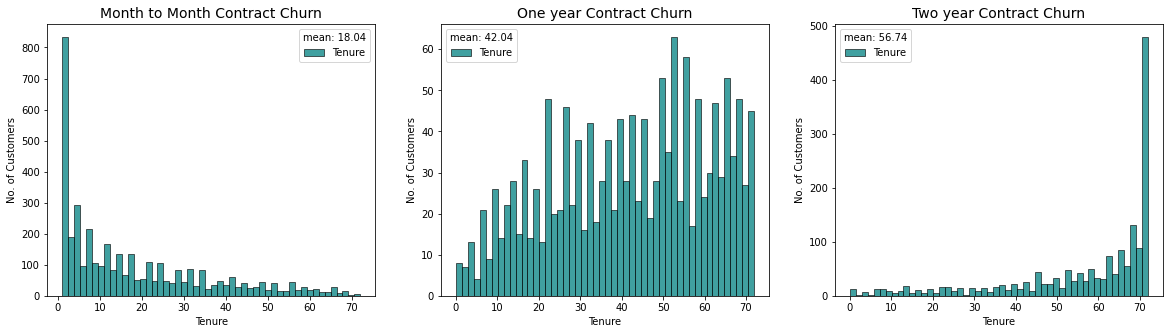

In [40]:
# traditional way of creating visualizations

fig = plt.subplots(1, 3, figsize=(20, 5))

plt.subplot(1, 3, 1)
ax = sns.histplot(
    df_eda[df_eda.Contract == 0]['tenure'],
    bins=50,
    # palette=palette[0], // used with hue
    color=palette[0],
)

ax.legend(['Tenure'], title=f'mean: {month_mean}', loc="upper right")
ax.set_title('Month to Month Contract Churn', size=14)
ax.set_xlabel('Tenure')
ax.set_ylabel('No. of Customers')


plt.subplot(1, 3, 2)
ax = sns.histplot(
    df_eda[df_eda.Contract == 1]['tenure'],
    bins=50,
    # palette=palette[0], // used with hue
    color=palette[0],
)

ax.legend(['Tenure'], title=f'mean: {one_year_mean}', loc="upper left")
ax.set_title('One year Contract Churn', size=14)
ax.set_xlabel('Tenure')
ax.set_ylabel('No. of Customers')


plt.subplot(1, 3, 3)
ax = sns.histplot(
    df_eda[df_eda.Contract == 2]['tenure'],
    bins=50,
    # palette=palette[0], // used with hue
    color=palette[0],
)

ax.legend(['Tenure'], title=f'mean: {two_year_mean}', loc="upper left")
ax.set_title('Two year Contract Churn', size=14)
ax.set_xlabel('Tenure')
ax.set_ylabel('No. of Customers')


plt.show()


In [ ]:
# optimized version of data visualization by passing parameters dynamically


# import num2word
# from src.helpers import number2text
from src.visualizations import visualize_by_contract

# def visualize_by_contract(df, rows, cols, group_count, param='', selected_col='', bins=50, font_size=14):
#     fig = plt.subplots(1, 3, figsize=(20, 5))

#     for i in range(0, group_count):
#         txt_en = int_to_en(i)
#         period_txt = "month_mean" if i == 0 else txt_en + "_year_mean"

#         plt.subplot(rows, cols, i+1)
#         ax = sns.histplot(
#             df[df[param] == i][selected_col],
#             bins=50,
#             # palette=palette[0], // used with hue
#             color=palette[0],
#         )

#         ax.legend(
#             [selected_col.capitalize()],
#             # by using eval function we can evaluate the text as parameter
#             title=f'mean: {eval(period_txt)}',
#             loc="upper left"
#         )
#         ax.set_title(
#             f'{period_txt} year Contract Churn',
#             size=14  # we can change it to dynamic way also
#         )
#         ax.set_xlabel(selected_col.title())
#         ax.set_ylabel('No. of Customers')

#     plt.show()


visualize_by_contract(df_eda, 1, 3, 3, 'Contract', 'tenure', 50, 14, month_mean, one_year_mean, two_year_mean)


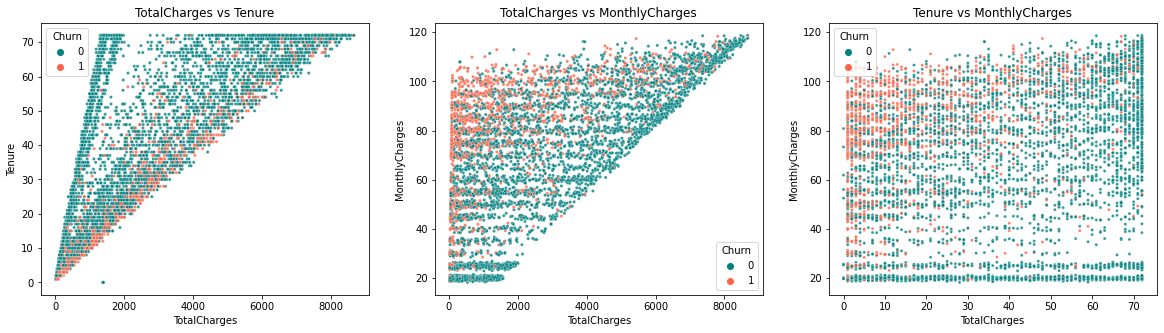

In [45]:
# correlations between numerical features 

# scatter-plot (default way of visualizing)


fig = plt.figure(figsize=(20, 5))


plt.subplot(1, 3, 1)
ax1 = sns.scatterplot(
    # if we define our data frame on beginning then it's not necessary to define it in all parameters again (for example instead of df_eda['Churn'] we can define as 'Churn')
    data=df_eda,
    x=df_eda['TotalCharges'],
    y=df_eda['tenure'],
    hue='Churn',
    palette=palette[0:2],
    alpha=0.8,  # alpha => opacity of values in scatterplot
    # s => size
    s=10
)

plt.title('TotalCharges vs Tenure')
# plt.legend(['No', 'Yes'])
ax1.set_xlabel('TotalCharges')
ax1.set_ylabel('Tenure')

plt.subplot(1, 3, 2)
ax2 = sns.scatterplot(
    # if we define our data frame on beginning then it's not necessary to define it in all parameters again (for example instead of df_eda['Churn'] we can define as 'Churn')
    data=df_eda,
    x=df_eda['TotalCharges'],
    y=df_eda['MonthlyCharges'],
    hue='Churn',
    palette=palette[0:2],
    alpha=0.8,  # alpha => opacity of values in scatterplot
    # s => size
    s=10
)


plt.title('TotalCharges vs MonthlyCharges')
ax2.set_xlabel('TotalCharges')
ax2.set_ylabel('MonthlyCharges')

plt.subplot(1, 3, 3)
ax3 = sns.scatterplot(
    data=df_eda,
    x=df_eda['tenure'],
    y=df_eda['MonthlyCharges'],
    hue='Churn',
    palette=palette[0:2],
    alpha=0.8,
    s=9
)

plt.title('Tenure vs MonthlyCharges')
ax3.set_xlabel('TotalCharges')
ax3.set_ylabel('MonthlyCharges')

plt.show()


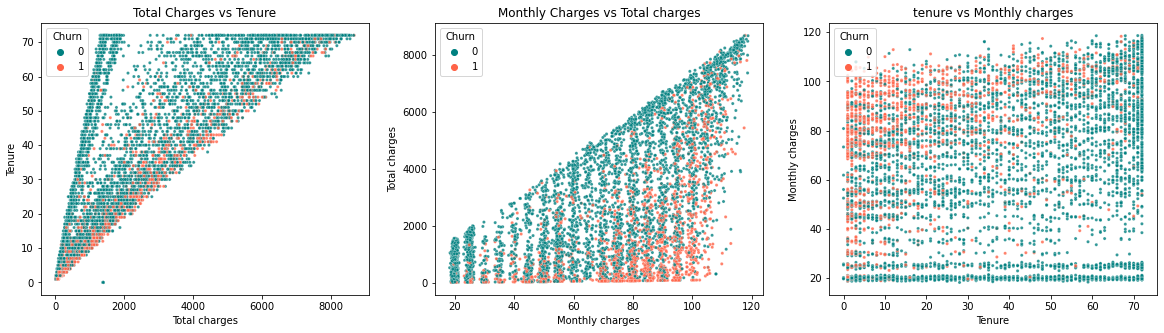

In [46]:
# correlations between numerical features 

# dynamic way of visualizing of scatter plots

from src.visualizations import numeric_fe_scatter_vis
# from src.helpers import separete_words

# def separete_word(w):
#     # additional function for separating words (2)

#     words = [char for char in w if char.isupper()]

#     second_word_first_letter = ''
#     if(len(words) > 1):
#         second_word_first_letter = words[1]
#     else:
#         return w

#     words_list = w.split(second_word_first_letter)

#     word_res = words_list[0] + " " + second_word_first_letter + words_list[1]

#     # print(word_res)
#     return word_res


# def numeric_fe_scatter_vis(df, rows, cols, words, hue='Churn'):

#     fig = plt.figure(figsize=(20, 5))

#     for i, word in enumerate(words):
#         # print(words[i], words[i-1])

#         plt.subplot(rows, cols, i+1)
#         ax = sns.scatterplot(
#             # if we define our data frame on beginning then it's not necessary to define it in all parameters again (for example instead of df1['Churn'] we can define as 'Churn')
#             data=df,
#             x=words[i],
#             y=words[i-1],
#             hue=hue,
#             palette=palette[0:2],
#             alpha=0.8,  # alpha => opacity of values in scatterplot
#             # s => size
#             s=10
#         )

#         plt.title(separete_word(words[i]) +
#                   " vs " + separete_word(words[i-1]).capitalize())
#         # plt.legend(['No', 'Yes'])
#         ax.set_xlabel(separete_word(words[i]).capitalize())
#         ax.set_ylabel(separete_word(words[i-1]).capitalize())

#     plt.show()


numeric_fe_scatter_vis(df_eda, 1, 3, ['TotalCharges', 'MonthlyCharges', 'tenure'], 'Churn')


In [47]:
# # Summary

# From the plots above we can conclude that:

# a lot of customers churned after just a month;
# the longer the contract, the longer customer stays with the provider (higher mean score);
# customers with higher Monthly Charges are more likely to churn;
# the longer the customer has been with the provider the more likely he will not churn.


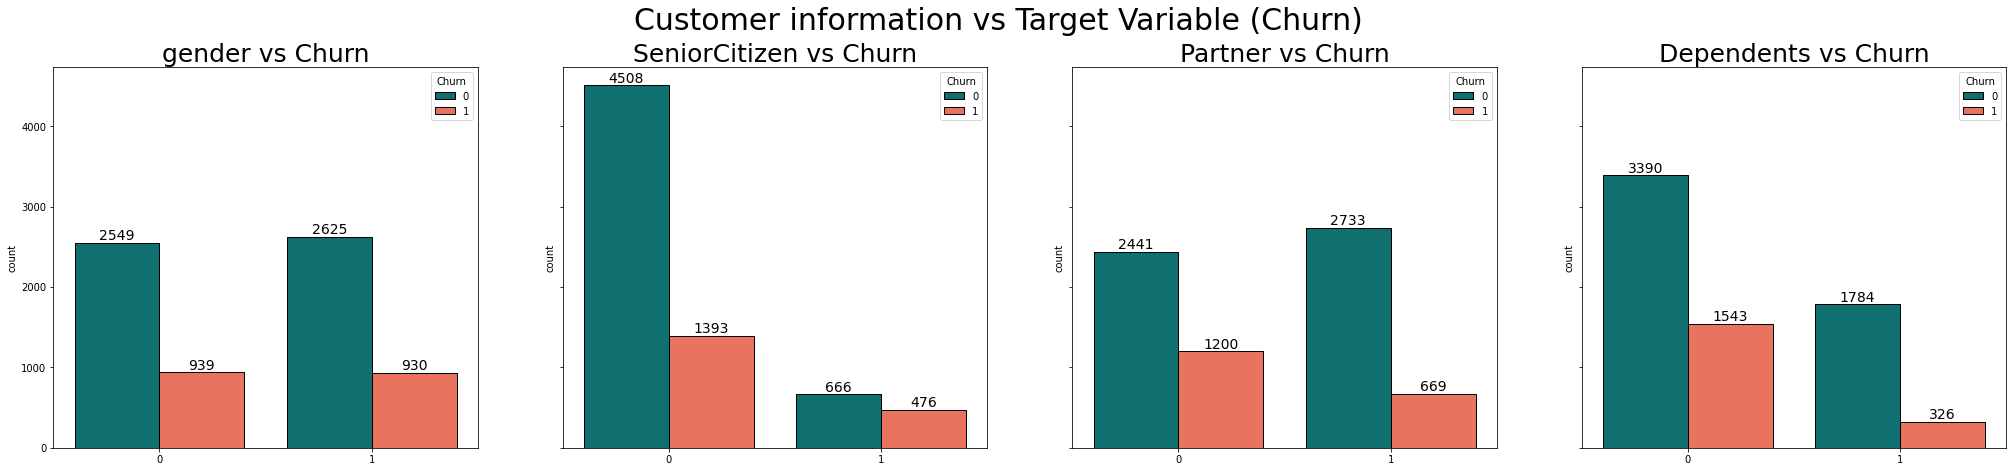

In [48]:
# Categorical Features vs Target Variable (Churn)

from src.visualizations import countplots_vis

# countplots visualisation

# def countplots_vis(dataset, columns_list, rows, cols, figsize, suptitle, hue, palette):
#     fig, axs = plt.subplots(rows, cols, sharey=True, figsize=figsize)

#     fig.suptitle(suptitle, y=1, size=30)

#     for i, data in enumerate(columns_list):
#         ax = sns.countplot(
#             data=dataset,
#             ax=axs[i],
#             x=columns_list[i],
#             hue=hue,
#             palette=palette,
#             edgecolor='black')

#         axs[i].set_title(data + f' vs {hue}', size=25)

#         # each bar label in axis
#         for i in ax.containers:
#             ax.bar_label(i, size=14)
#             ax.set_xlabel('')


countplots_vis(dataset=df_eda,
               columns_list=['gender', 'SeniorCitizen',
                             'Partner', 'Dependents'],
               rows=1,
               cols=4,
               figsize=(35, 7),
               hue='Churn',
               palette=palette,
               suptitle='Customer information vs Target Variable (Churn)')

# plt.tight_layout()


In [49]:
#  VALUE_COUNTS 

# counting each gender (unique genders) based on churn factor

gender = df_eda[df_eda['Churn'] == 1]['gender'].value_counts()
gender_pie_values = [gender[0] /
                     sum(gender) * 100, gender[1] / sum(gender) * 100]
# gender_pie_values

senior_citizen = df_eda[df_eda['Churn'] == 1]['SeniorCitizen'].value_counts()
s_c_pie_values = [senior_citizen[0] /
                  sum(senior_citizen) * 100, senior_citizen[1] / sum(senior_citizen) * 100]
# s_c_pie_values

partner = df_eda[df_eda['Churn'] == 1]['Partner'].value_counts()
p_pie_values = [partner[0] / sum(partner) * 100,
                partner[1] / sum(partner) * 100]

dependents = df_eda[df_eda['Churn'] == 1]['Dependents'].value_counts()
d_pie_values = [dependents[0] /
                sum(dependents) * 100, dependents[1] / sum(dependents) * 100]


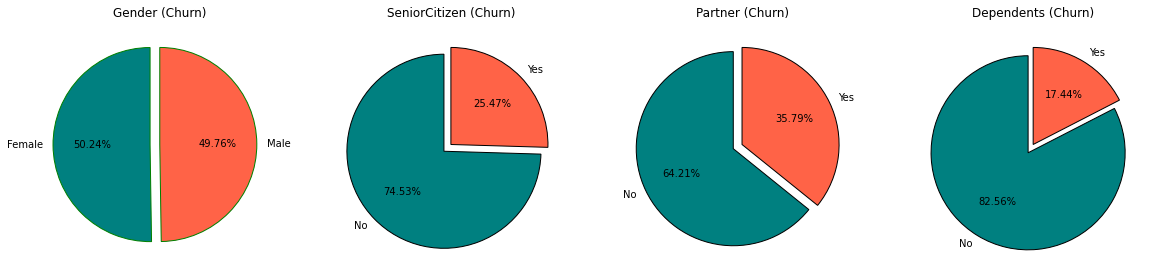

In [50]:
# pie charts (traditional approach)

ax, fig = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

plt.subplot(1, 4, 1)

plt.pie(gender_pie_values, labels=['Female', 'Male'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0),
        colors=palette,
        wedgeprops={'edgecolor': 'green', 'linewidth': 1, 'antialiased': True})

plt.title('Gender (Churn)')


plt.subplot(1, 4, 2)

plt.pie(s_c_pie_values, labels=['No', 'Yes'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0),
        colors=palette,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

plt.title('SeniorCitizen (Churn)')


plt.subplot(1, 4, 3)

plt.pie(p_pie_values, labels=['No', 'Yes'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0),
        colors=palette,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

plt.title('Partner (Churn)')


plt.subplot(1, 4, 4)

plt.pie(d_pie_values, labels=['No', 'Yes'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0),
        colors=palette,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

plt.title('Dependents (Churn)')

plt.show()


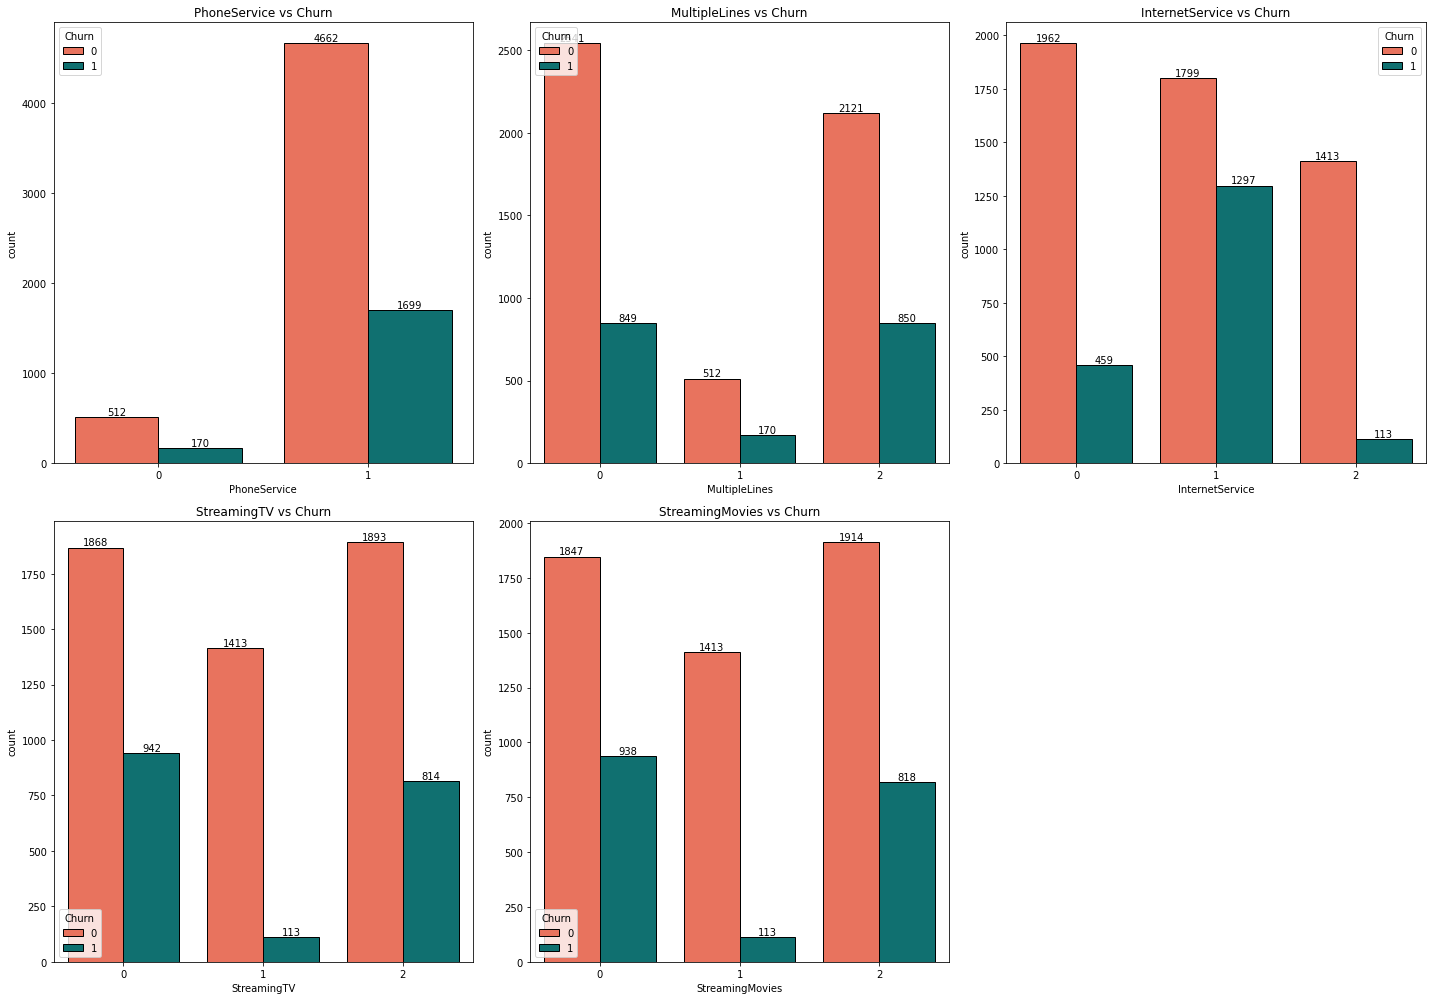

In [51]:

list2 = ['PhoneService', 'MultipleLines',
         'InternetService', 'StreamingTV', 'StreamingMovies']

fig = plt.figure(figsize=(20, 14))


plt.subplot(2, 3, 1)
ax = sns.countplot(
    data=df_eda,
    x=list2[0],
    hue="Churn",
    palette=palette2,
    edgecolor='black')
ax.legend(loc='upper left', title='Churn')

for i in ax.containers:
    ax.bar_label(i,)

title = list2[0] + ' vs Churn'
plt.title(title)


plt.subplot(2, 3, 2)
ax = sns.countplot(
    data=df_eda,
    x=list2[1],
    hue="Churn",
    palette=palette2,
    edgecolor='black')
ax.legend(loc='upper left', title='Churn')

for i in ax.containers:
    ax.bar_label(i,)

title = list2[1] + ' vs Churn'
plt.title(title)


plt.subplot(2, 3, 3)
ax = sns.countplot(
    data=df_eda,
    x=list2[2],
    hue="Churn",
    palette=palette2,
    edgecolor='black')
ax.legend(loc='upper right', title='Churn')

for i in ax.containers:
    ax.bar_label(i,)

title = list2[2] + ' vs Churn'
plt.title(title)


plt.subplot(2, 3, 4)
ax = sns.countplot(
    data=df_eda,
    x=list2[3],
    hue="Churn",
    palette=palette2,
    edgecolor='black')
ax.legend(loc='lower left', title='Churn')

for i in ax.containers:
    ax.bar_label(i,)

title = list2[3] + ' vs Churn'
plt.title(title)


plt.subplot(2, 3, 5)
ax = sns.countplot(
    data=df_eda,
    x=list2[4],
    hue="Churn",
    palette=palette2,
    edgecolor='black')
ax.legend(loc='lower left', title='Churn')

for i in ax.containers:
    ax.bar_label(i,)

title = list2[4] + ' vs Churn'
plt.title(title)

plt.tight_layout()

plt.show()


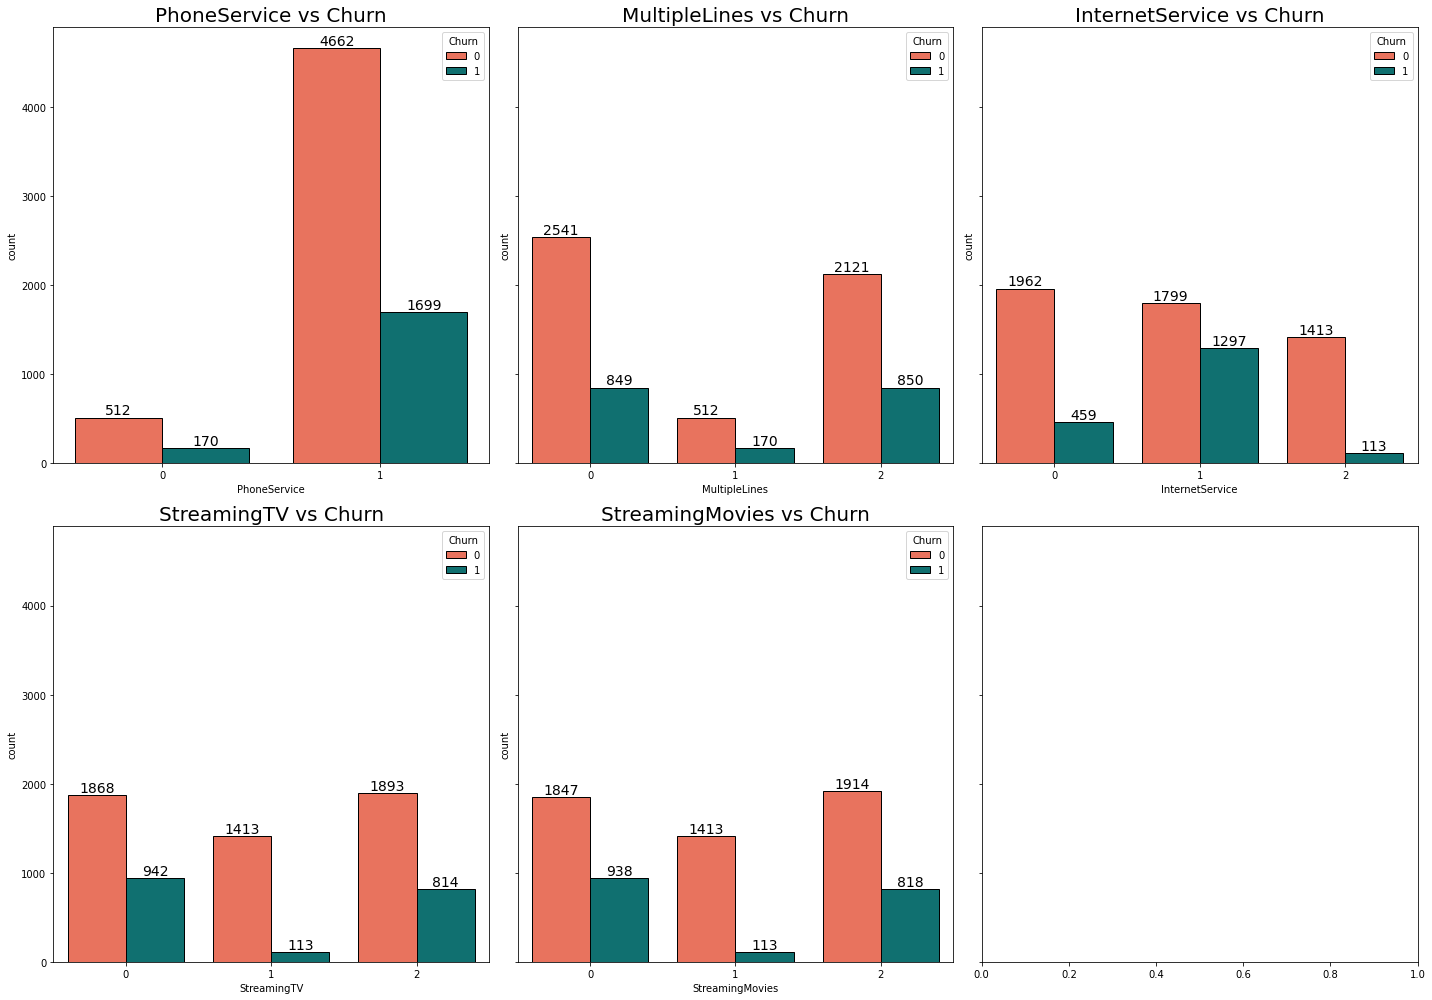

In [52]:
# count plot visualization (dynamic approach)

from src.visualizations import countplots_vis2

# def countplots_vis2(dataset, columns_list, rows, cols, figsize, suptitle='', hue='', palette=''):
#     fig = plt.subplots(rows, cols, sharey=True, figsize=figsize)

#     # fig.suptitle(suptitle, y=1, size=30)

#     for i, data in enumerate(columns_list):
#         plt.subplot(rows, cols, i+1)

#         ax = sns.countplot(
#             data=dataset,
#             # ax=axs[i],
#             x=columns_list[i],
#             hue=hue,
#             palette=palette,
#             edgecolor='black')

#         ax.set_title(data + f' vs {hue}', size=20)

#         # each bar label in axis
#         for i in ax.containers:
#             ax.bar_label(i, size=14)


list2 = ['PhoneService', 'MultipleLines',
         'InternetService', 'StreamingTV', 'StreamingMovies']

countplots_vis2(dataset=df_eda,
                columns_list=list2,
                rows=2,
                cols=3,
                figsize=(20, 14),
                # suptitle='',
                hue='Churn',
                palette=palette2,
                )


plt.tight_layout()

plt.show()


In [53]:
phone = df_eda[df_eda['Churn'] == 1]['PhoneService'].value_counts()
phone_pie_values = [phone[0] / sum(phone) * 100,
                    phone[1] / sum(phone) * 100]

MultipleLines = df_eda[df_eda['Churn'] == 1]['MultipleLines'].value_counts()
ml_pie_values = [MultipleLines[0] / sum(MultipleLines) * 100,
                 MultipleLines[1] / sum(MultipleLines) * 100,
                 MultipleLines[2] / sum(MultipleLines) * 100]

InternetService = df_eda[df_eda['Churn'] == 1]['InternetService'].value_counts()
is_pie_values = [InternetService[0] / sum(InternetService) * 100,
                 InternetService[1] / sum(InternetService) * 100,
                 InternetService[2] / sum(InternetService) * 100]

StreamingTV = df_eda[df_eda['Churn'] == 1]['StreamingTV'].value_counts()
stv_pie_values = [StreamingTV[0] / sum(StreamingTV) * 100,
                  StreamingTV[1] / sum(StreamingTV) * 100,
                  StreamingTV[2] / sum(StreamingTV) * 100]

# each unique values count (count of same rows by grouping -> value_counts())
StreamingMovies = df_eda[df_eda['Churn'] == 1]['StreamingMovies'].value_counts()
# percentages of movies
smovie_pie_values = [StreamingMovies[0] / sum(StreamingMovies) * 100,
                     StreamingMovies[1] / sum(StreamingMovies) * 100,
                     StreamingMovies[2] / sum(StreamingMovies) * 100]
StreamingMovies


0    938
2    818
1    113
Name: StreamingMovies, dtype: int64

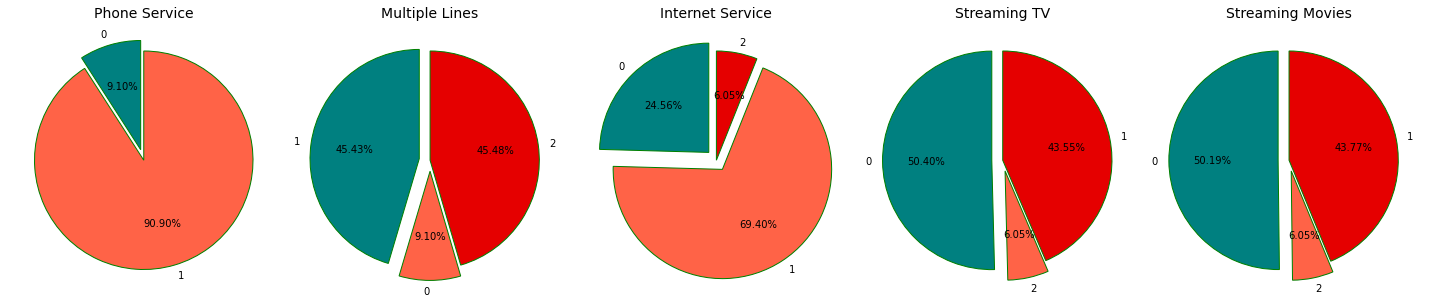

In [54]:
# dynamic pie chart visualization 

from src.visualizations import pie_chart_vis


# def pie_chart_vis(df, rows, cols, pie_values_list, cols_list, figsize=(20, 20)):
#     fig = plt.figure(figsize=figsize)

#     for i, v in enumerate(pie_values_list):
#         # print(pie_values_list[i])

#         explode = [0.1 if every > 0 else 0 for every in range(
#             len(pie_values_list[i]))]
#         explode = tuple(reversed(explode))
#         # print(explode)

#         labels = df[cols_list[i]].unique()
#         # print(labels)

#         plt.subplot(rows, cols, i+1)
#         plt.pie(pie_values_list[i],
#                 labels=labels,
#                 autopct='%1.2f%%',
#                 startangle=90,
#                 explode=explode,
#                 colors=palette,
#                 wedgeprops={'edgecolor': 'green', 'linewidth': 1, 'antialiased': True})

#         plt.title(separete_word(cols_list[i]), size=14)

#     plt.tight_layout()
#     plt.show()


pie_chart_vis(df=df_eda,
              rows=2,
              cols=5,
              pie_values_list=[phone_pie_values,
                               ml_pie_values,
                               is_pie_values,
                               stv_pie_values,
                               smovie_pie_values],
              cols_list=['PhoneService',
                         'MultipleLines',
                         'InternetService',
                         'StreamingTV',
                         'StreamingMovies']
              )


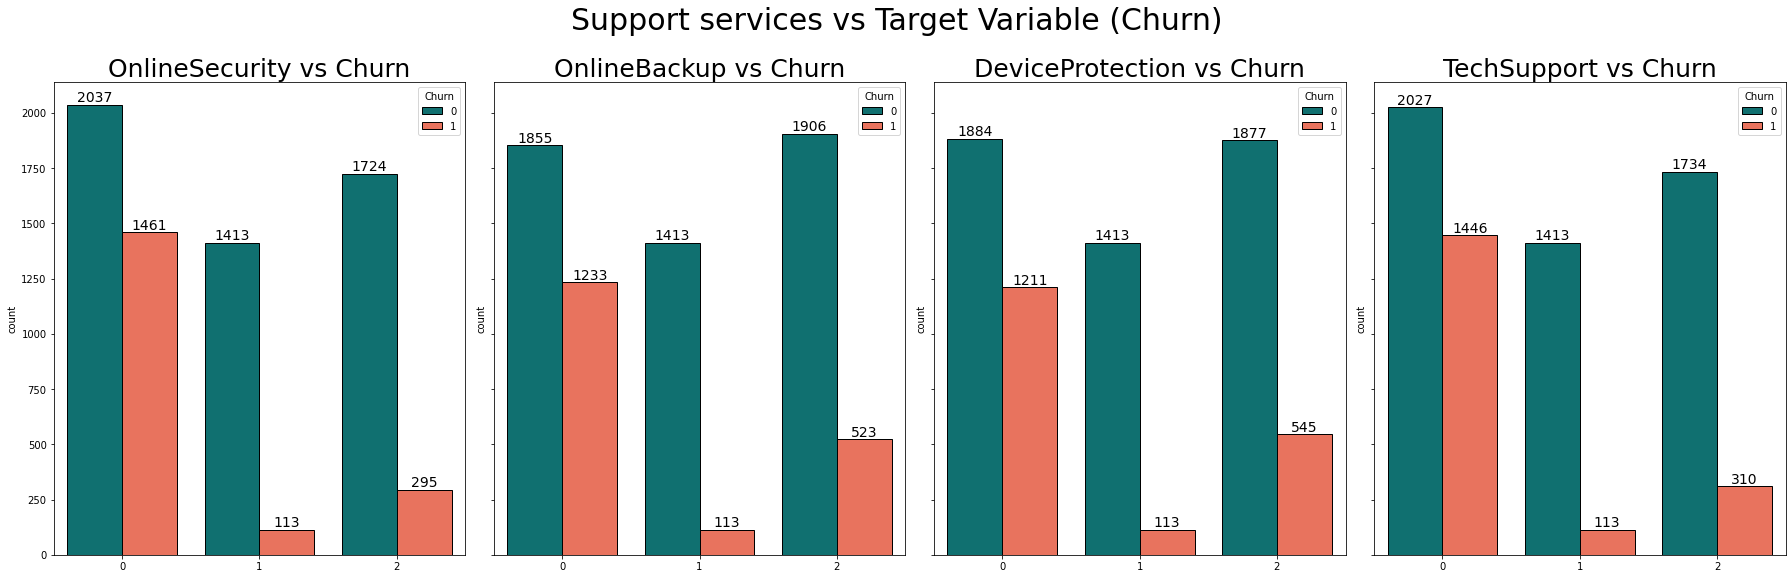

In [55]:
list3 = ['OnlineSecurity',
         'OnlineBackup',
         'DeviceProtection',
         'TechSupport']

countplots_vis(dataset=df_eda,
               columns_list=list3,
               rows=1,
               cols=4,
               figsize=(25, 8),
               hue='Churn',
               palette=palette,
               suptitle='Support services vs Target Variable (Churn)')

plt.tight_layout()


In [56]:
pie_values1 = df_eda[df_eda['Churn'] == 1]['OnlineSecurity'].value_counts()
os_pie_values = [pie_values1[0] / sum(pie_values1) * 100,
                 pie_values1[1] / sum(pie_values1) * 100,
                 pie_values1[2] / sum(pie_values1) * 100]

pie_values2 = df_eda[df_eda['Churn'] == 1]['OnlineBackup'].value_counts()
ob_pie_values = [pie_values2[0] / sum(pie_values2) * 100,
                 pie_values2[1] / sum(pie_values2) * 100,
                 pie_values2[2] / sum(pie_values2) * 100]

pie_values3 = df_eda[df_eda['Churn'] == 1]['DeviceProtection'].value_counts()
dp_pie_values = [pie_values3[0] / sum(pie_values3) * 100,
                 pie_values3[1] / sum(pie_values3) * 100,
                 pie_values3[2] / sum(pie_values3) * 100]

# value_counts of each tech support group
pie_values4 = df_eda[df_eda['Churn'] == 1]['TechSupport'].value_counts()
# percentage of pie values
ts_pie_values = [pie_values4[0] / sum(pie_values4) * 100,
                 pie_values4[1] / sum(pie_values4) * 100,
                 pie_values4[2] / sum(pie_values4) * 100]


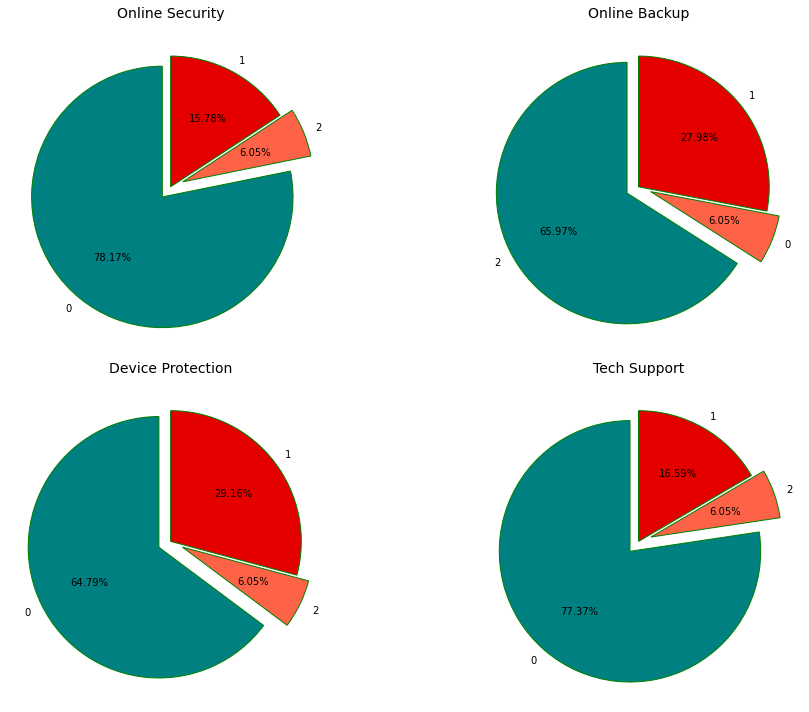

In [57]:
pie_chart_vis(df_eda,
              2,
              2,
              pie_values_list=[os_pie_values, ob_pie_values,
                               dp_pie_values, ts_pie_values],
              cols_list=['OnlineSecurity',
                         'OnlineBackup',
                         'DeviceProtection',
                         'TechSupport', ],
              figsize=(15, 10)
              )


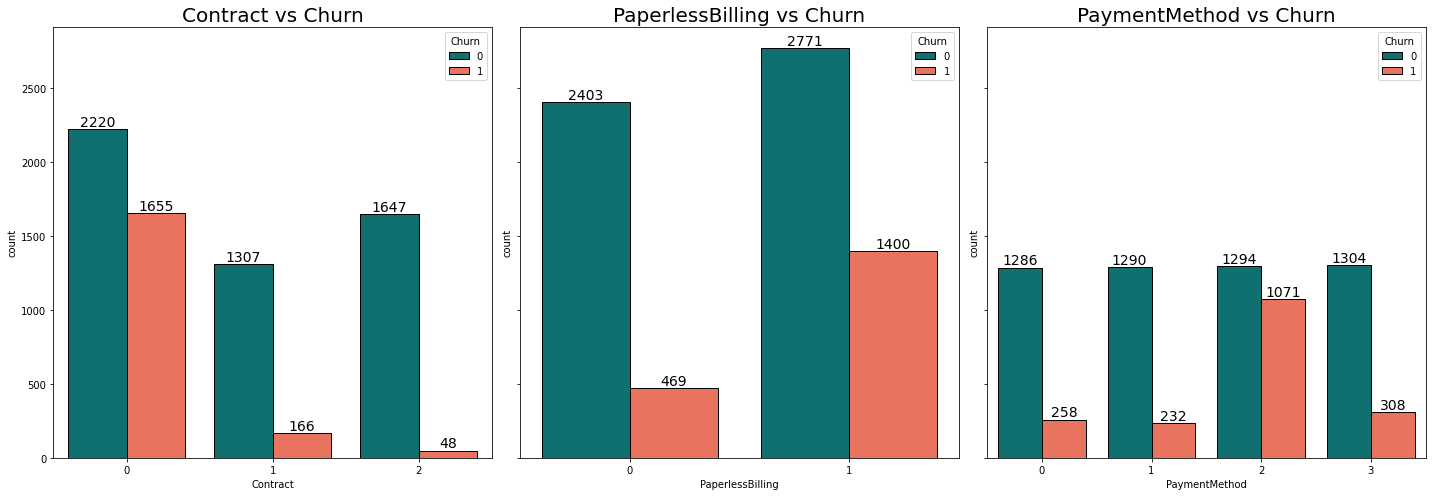

In [58]:
list3 = ['Contract',
         'PaperlessBilling',
         'PaymentMethod']

countplots_vis2(
    rows=1,
    cols=3,
    dataset=df_eda,
    columns_list=list3,
    hue="Churn",
    palette=palette,
    figsize=(20, 7),
    # suptitle='Contract, PaperlessBilling, PaymentMethod vs Churn',
)

plt.tight_layout()


In [59]:
contract = df_eda[df_eda['Churn'] == 1]['Contract'].value_counts()
contract_pie_values = [contract[0] / sum(contract) * 100,
                       contract[1] / sum(contract) * 100,
                       contract[2] / sum(contract) * 100]

paperless = df_eda[df_eda['Churn'] == 1]['PaperlessBilling'].value_counts()
pb_pie_values = [paperless[0] / sum(paperless) * 100,
                 paperless[1] / sum(paperless) * 100]

# values
payment = df_eda[df_eda['Churn'] == 1]['PaymentMethod'].value_counts()
# percentage
pm_pie_values = [payment[0] / sum(payment) * 100,
                 payment[1] / sum(payment) * 100,
                 payment[2] / sum(payment) * 100,
                 payment[3] / sum(payment) * 100]


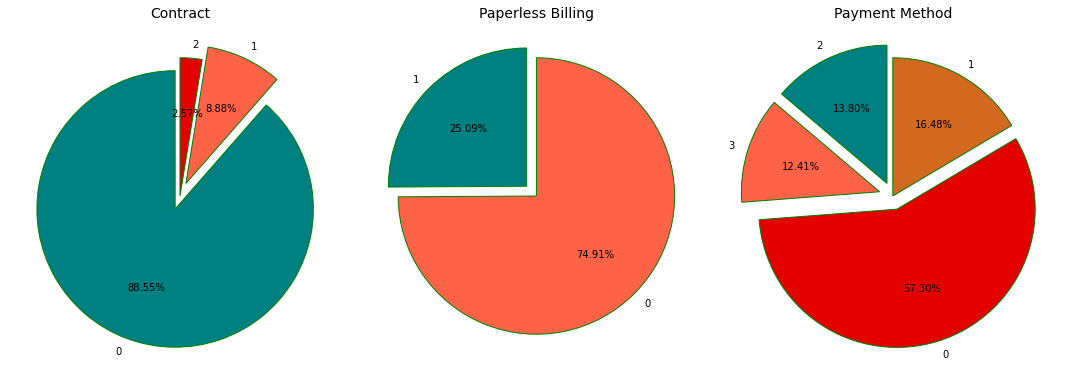

In [60]:
pie_chart_vis(
    df_eda,
    1,
    3,
    [contract_pie_values,
     pb_pie_values,
     pm_pie_values],
    ['Contract', 'PaperlessBilling', 'PaymentMethod'],
    figsize=(15, 10)
)


In [61]:
# Summary (categoric)

# Short term contracts have much higher churn rates.

# Customers with paperless billing are more probable to churn.

# Customers with electronic check as a payment method are much more likely to churn.


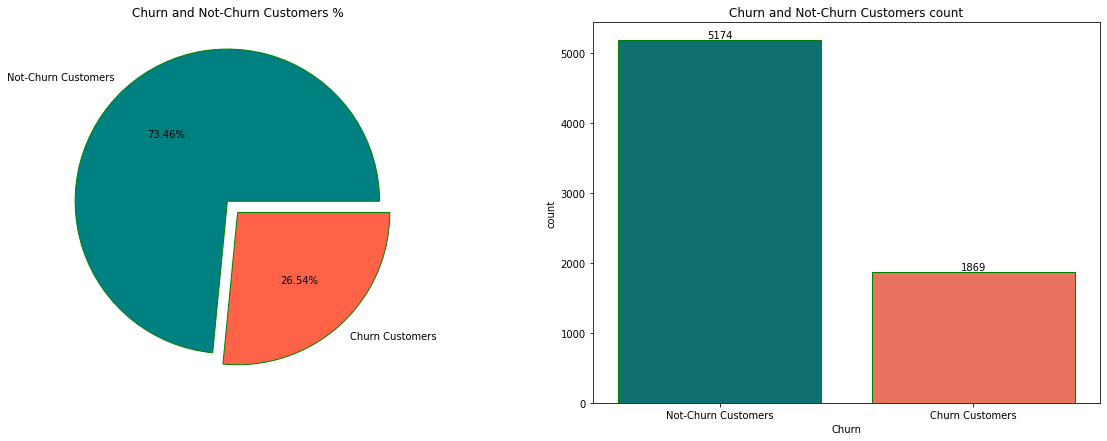

In [62]:
# 3. Data imbalance check

l1 = list(raw_df['Churn'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]
pie_values


fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))


# 1st subplot
plt.subplot(1, 2, 1)
plt.pie(x=pie_values,
        labels=['Not-Churn Customers', 'Churn Customers'],
        autopct='%1.2f%%',  # show percentage of customers chun
        explode=(0.1, 0),  # separate pies (white blank on pie)
        colors=palette,
        wedgeprops={'edgecolor': 'green', 'linewidth': 1, 'antialiased': True}
        )
plt.title('Churn and Not-Churn Customers %')


# 2nd subplot
plt.subplot(1, 2, 2)
ax = sns.countplot(data=raw_df,
                   x='Churn',  # column name (x axis)
                   #    hue=['Churn']
                   palette=palette,
                   edgecolor='green',
                   )

# show number of customers on top of the each count(bar) plot
for cnt in ax.containers:
    ax.bar_label(cnt, color='black')

# set x axis labels
ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])

plt.title('Churn and Not-Churn Customers count')


plt.show()


In [63]:
# Imbalanced data requires different approach


# Dataset is imbalanced with almost 1: 4 ratio. It's not an extreme value, but it's still significant.

# This means that a blind guess(bet on "Not-Churn") would give us accuracy of 73%.

# We should use stratified splitting during train-test split.
# We should be extra careful when dealing with outliers(we can delete meaningull information).
# We should consider undersampling or oversampling techniques.


In [64]:
# Choosing the most suitable metrics | recall


# We can assume that additional actions(to prevent churning) will help if applied to any Customer(churning or not).
# We can also expect that the additional care (or other activities) will cost us more effort.
# And that’s why…

# We want to avoid the situation when we identify churn Customer as not-churn, because in such case we lose the opportunity to prevent churn.
# When a not-churn Customer is identified as churning an extra effort will make no negative effect for the customer, but it will cost us extra effort. We can probably afford this scenario to some extent if it helps with churning customer identification.
# In other words we want to avoid false negatives as much as possible. A false negative case means that a churn-positive customer is assessed to not-churn, which is detrimental. False positives(a not-churn identified as churn) are not as important as preventing a churning. It will make no negative effect for the customer, but it will cost us extra effort.

# The most suitable metrics are:

# Recall: the ability of a model to find all the relevant cases within a data set.
# ROC-AUC: ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.


In [65]:
# starttt

In [66]:
raw_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [67]:
# 4. Feature Engineering

from src import LabelEncoder
# from sklearn.preprocessing import LabelEncoder

labelEnc = LabelEncoder()

df4 = raw_df

# v1. apply label encoder to all the features
df4 = df4.apply(labelEnc.fit_transform)

# v2. apply label encoder only for categorical features
# df4 = df4.apply(labelEnc.fit_transform)
# df4 = pd.concat([df4, raw_df[numerical_cols]], axis=1)


X = df4.drop('Churn', axis=1)
y = df4['Churn']

X


customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  \
0                0              1                0               0   
1                1              0                0               2   
2                1              0                0               2   
3                0              1                0               2   
4                1              0                1               0   
...            ...            ...              ...             ...   
7038             1              2                0               2   
7039             1              2                1               0   
7040             0              1                0               2   
7041             1              2                1               0   
7042             1              0                1               2   

      OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0                2                 0            0            0   
1                0                 2            0            0   
2                2                 0            0            0   
3                0                 2            2            0   
4                0                 0            0            0   
...            ...               ...          ...          ...   
7038             0                 2            2            2   
7039             2                 2            0            2   
7040             0                 0            0            0   
7041             0                 0            0            0   
7042             0                 2            2            2   

      StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
0                   0         0                 1              2   
1                   0         1                 0              3   
2                   0         0                 1              3   
3                   0         1                 0              0   
4                   0         0                 1              2   
...               ...       ...               ...            ...   
7038                2         1                 1              3   
7039                2         1                 1              1   
7040                0         0                 1              2   
7041                0         0                 1              3   
7042                2         2                 1              0   

      MonthlyCharges  TotalCharges  
0                142          2505  
1                498          1466  
2                436           157  
3                266          1400  
4                729           925  
...              ...           ...  
7038             991          1597  
7039            1340          5698  
7040             137          2994  
7041             795          2660  
7042            1388          5407  

[7043 rows x 20 columns]

In [68]:
df4['Churn'].value_counts()

# check if data balanced or imbalanced
# 1869 / 5174 * 100% = 36.7%

# it shows that it's most probably imbalanced (in most cases if 70% higher / 30% lower then data is imbalanced)

# we will implement SMOTE and RandomUnderSample for balancing dataset. and then we will consider which one is better


0    5174
1    1869
Name: Churn, dtype: int64

In [69]:
# Data Balancing (OverSampling)
# We know that dataset imbalanced and we need to balance it

# from imblearn.pipeline import Pipeline
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE
# import imblearn

from src import Pipeline, SMOTE
from src import Counter


# Data Balancing using SMOTE:

over_sample = SMOTE(sampling_strategy=0.8)
# under_sample = RandomUnderSampler(sampling_strategy=0.15) # under sampling

steps = [('over', over_sample)]
pipeline = Pipeline(steps=steps)
X_oversampled, y_oversampled = pipeline.fit_resample(X, y)

Counter(y_oversampled)


Counter({0: 5174, 1: 4139})

In [70]:
# calculate the balance of dataset

# 4130 / 5163 * 100% => 80 % ( data oversampled )


In [71]:
# # Data Balancing (UnderSampling)

# # We know that dataset imbalanced and we need to balance it

# from src import Pipeline, RandomUnderSampler
# from src import Counter

# from imblearn.pipeline import Pipeline
# from imblearn.under_sampling import RandomUnderSampler
# # from imblearn.over_sampling import SMOTE
# from collections import Counter
# import imblearn


# # Data Balancing using UnderSampling:

# rand_under_sample = RandomUnderSampler(sampling_strategy=0.8, random_state=20, replacement=True)
# X_undersampled, y_undersampled = rand_under_sample.fit_resample(X, y)

# Counter(y_undersampled)


In [72]:
# calculate the balance of dataset

# 1869 / 2336 * 100% => 80 % ( data oversampled)


In [73]:
# setting random state of splitted dataset
random_state = 10


In [74]:
# # Base data splitting

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, stratify=y, test_size=0.25, random_state=11)


In [75]:
# OverSampled data splitting

X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled, y_oversampled, stratify=y_oversampled, test_size=0.25, random_state=random_state)


In [76]:
# # UnderSampled data splitting


# X_train, X_test, y_train, y_test = train_test_split(
#     X_undersampled, y_undersampled, stratify=y_undersampled, test_size=0.25, random_state=11)


In [77]:
# # Splitting the data

# # # ! Spliting the data into train and test datasets and avoid Data Leakage problem
# # !!  https://www.quora.com/Is-it-correct-in-Machine-Learning-to-first-split-into-train-and-test-and-then-replace-NAs-with-the-average-of-the-training-set


In [ ]:
X_train


In [ ]:
X_test

In [80]:
# 5. Data Preprocessing


# ! Check if exists, then drop
# drop customer id column
X_train = X_train.drop('customerID', axis=1)
X_test = X_test.drop('customerID', axis=1)


In [81]:
# # data types

X_train.dtypes


gender              int32
SeniorCitizen       int64
Partner             int32
Dependents          int32
tenure              int64
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
MonthlyCharges      int64
TotalCharges        int32
dtype: object

In [82]:
X_test.dtypes


gender              int32
SeniorCitizen       int64
Partner             int32
Dependents          int32
tenure              int64
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
MonthlyCharges      int64
TotalCharges        int32
dtype: object

In [83]:
# Get median values

# total_charges_median_test = np.median(X_train.TotalCharg[X_train.TotalCharges > 0])
total_charges_median_train = np.median(X_train.TotalCharges)
total_charges_median_train

# total_charges_median_test = np.median(X_test.TotalCharges[X_test.TotalCharges > 0])
total_charges_median_test = np.median(X_test.TotalCharges)
total_charges_median_test


3125.0

In [84]:
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
X_train

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        0           0       5             1   
1          1              0        0           1      72             1   
2          1              1        1           0       7             1   
3          1              0        1           0      18             1   
4          0              0        0           0      29             1   
...      ...            ...      ...         ...     ...           ...   
6979       1              0        1           1      72             1   
6980       1              0        1           1      17             1   
6981       0              1        0           0      16             1   
6982       1              0        1           1      46             1   
6983       1              0        0           0       1             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0                1               0             0   
1                 0                2               1             1   
2                 2                1               2             2   
3                 2                1               0             0   
4                 2                0               0             0   
...             ...              ...             ...           ...   
6979              2                2               1             1   
6980              0                1               2             0   
6981              0                1               0             0   
6982              0                2               1             1   
6983              0                0               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            2            0                0         0   
1                    1            1            1                1         2   
2                    0            0            0                2         0   
3                    0            0            2                2         0   
4                    0            0            2                2         1   
...                ...          ...          ...              ...       ...   
6979                 1            1            1                1         2   
6980                 2            0            2                0         0   
6981                 0            1            1                1         0   
6982                 1            1            1                1         2   
6983                 0            2            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1              3             820          3406  
1                    0              1              27           954  
2                    1              1            1182          5335  
3                    1              2            1186          1192  
4                    1              1             735          1710  
...                ...            ...             ...           ...  
6979                 0              3             114          1417  
6980                 1              2            1081           969  
6981                 1              1            1151           919  
6982                 1              3              31          6410  
6983                 1              2             438          4434  

[6984 rows x 19 columns]

In [85]:
X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)
X_test

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        0           0      41             1   
1          0              0        1           1      48             1   
2          1              0        0           0       4             1   
3          1              0        1           0      64             1   
4          0              0        0           0      10             1   
...      ...            ...      ...         ...     ...           ...   
2324       0              0        1           0      48             1   
2325       1              1        0           0      11             1   
2326       1              0        0           0      65             1   
2327       1              0        0           0       1             1   
2328       0              0        0           0       1             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                1               0             1   
1                 0                2               1             1   
2                 0                0               0             0   
3                 0                1               2             0   
4                 2                1               1             0   
...             ...              ...             ...           ...   
2324              2                0               2             0   
2325              0                1               0             0   
2326              2                1               0             2   
2327              0                2               1             1   
2328              0                0               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    1            0            0                0         0   
1                    1            1            1                1         2   
2                    0            0            0                0         0   
3                    0            0            0                0         0   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
2324                 0            2            0                0         1   
2325                 0            0            0                2         0   
2326                 2            2            2                2         0   
2327                 1            1            1                1         0   
2328                 0            0            1                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    0              2            1059          4801  
1                    0              3              20          6287  
2                    1              2             323          1595  
3                    1              3             778          4034  
4                    1              2             899          6378  
...                ...            ...             ...           ...  
2324                 1              0             555          2581  
2325                 1              2             929          6445  
2326                 1              2            1453          5472  
2327                 0              2              28          1493  
2328                 1              1             466          4562  

[2329 rows x 19 columns]

In [86]:

# ! as we know from EDA, there are na values(' ' / 0) in totalCharges feature
# let's replace/drop them


# X_train = X_train.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)

# v1
# temp = [i < 1 for i in X_train.TotalCharges]

# nulls_location = []

# for i, r in enumerate(temp):
#     if r == True:
#         # print(i)
#         nulls_location.append(i)

# nulls_location

# v1. drop null values
# # X_train = X_train.drop(nulls_location).reset_index(drop=True)
# # y_train = y_train.drop(nulls_location).reset_index(drop=True)

# # v2.1 replace null values
# X_train.TotalCharges = X_train.TotalCharges.replace(0, total_charges_median_train)

# # v2.2 replace null values
loc_na = X_train.TotalCharges == 0
X_train.loc[loc_na, 'TotalCharges'] = total_charges_median_train

X_train


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        0           0       5             1   
1          1              0        0           1      72             1   
2          1              1        1           0       7             1   
3          1              0        1           0      18             1   
4          0              0        0           0      29             1   
...      ...            ...      ...         ...     ...           ...   
6979       1              0        1           1      72             1   
6980       1              0        1           1      17             1   
6981       0              1        0           0      16             1   
6982       1              0        1           1      46             1   
6983       1              0        0           0       1             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0                1               0             0   
1                 0                2               1             1   
2                 2                1               2             2   
3                 2                1               0             0   
4                 2                0               0             0   
...             ...              ...             ...           ...   
6979              2                2               1             1   
6980              0                1               2             0   
6981              0                1               0             0   
6982              0                2               1             1   
6983              0                0               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            2            0                0         0   
1                    1            1            1                1         2   
2                    0            0            0                2         0   
3                    0            0            2                2         0   
4                    0            0            2                2         1   
...                ...          ...          ...              ...       ...   
6979                 1            1            1                1         2   
6980                 2            0            2                0         0   
6981                 0            1            1                1         0   
6982                 1            1            1                1         2   
6983                 0            2            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1              3             820        3406.0  
1                    0              1              27         954.0  
2                    1              1            1182        5335.0  
3                    1              2            1186        1192.0  
4                    1              1             735        1710.0  
...                ...            ...             ...           ...  
6979                 0              3             114        1417.0  
6980                 1              2            1081         969.0  
6981                 1              1            1151         919.0  
6982                 1              3              31        6410.0  
6983                 1              2             438        4434.0  

[6984 rows x 19 columns]

In [87]:
# after replacing zeros(na) with median value

X_train[loc_na]

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
831        0              0        1           1       0             0   
1051       0              0        1           1       0             1   
2574       0              0        1           1       0             1   
3545       1              0        1           1       0             1   
4220       1              0        1           1       0             1   
4780       1              0        1           1       0             1   
5164       1              0        0           1       0             1   
5354       0              0        1           1       0             0   
6263       1              0        1           1       0             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
831               1                0               2             0   
1051              0                0               2             2   
2574              0                2               1             1   
3545              0                2               1             1   
4220              0                2               1             1   
4780              2                2               1             1   
5164              2                0               2             2   
5354              1                0               2             2   
6263              2                2               1             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
831                  2            2            2                0         2   
1051                 2            0            2                2         2   
2574                 1            1            1                1         2   
3545                 1            1            1                1         2   
4220                 1            1            1                1         1   
4780                 1            1            1                1         2   
5164                 0            2            0                0         2   
5354                 2            2            2                0         2   
6263                 1            1            1                1         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
831                  1              0             419        3248.5  
1051                 0              3             917        3248.5  
2574                 0              3              29        3248.5  
3545                 0              3              26        3248.5  
4220                 1              3              23        3248.5  
4780                 0              3              99        3248.5  
5164                 1              0             579        3248.5  
5354                 0              1             480        3248.5  
6263                 0              3             107        3248.5

In [88]:
# X_test = X_test.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)

# v1
# temp = [i < 1 for i in X_test.TotalCharges]

# nulls_location = []

# for i, r in enumerate(temp):
#     if r == True:
#         # print(i)
#         nulls_location.append(i)

# nulls_location

# v1. drop null values
# X_test = X_test.drop(nulls_location).reset_index(drop=True)
# y_test = y_test.drop(nulls_location).reset_index(drop=True)

# # v2.1 replace null values
# X_test.TotalCharges = X_test.TotalCharges.replace(0, total_charges_median_train)

# # v2.2 replace null values
loc_na = X_test.TotalCharges == 0
X_test.loc[loc_na, 'TotalCharges'] = total_charges_median_test

X_test


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        0           0      41             1   
1          0              0        1           1      48             1   
2          1              0        0           0       4             1   
3          1              0        1           0      64             1   
4          0              0        0           0      10             1   
...      ...            ...      ...         ...     ...           ...   
2324       0              0        1           0      48             1   
2325       1              1        0           0      11             1   
2326       1              0        0           0      65             1   
2327       1              0        0           0       1             1   
2328       0              0        0           0       1             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                1               0             1   
1                 0                2               1             1   
2                 0                0               0             0   
3                 0                1               2             0   
4                 2                1               1             0   
...             ...              ...             ...           ...   
2324              2                0               2             0   
2325              0                1               0             0   
2326              2                1               0             2   
2327              0                2               1             1   
2328              0                0               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    1            0            0                0         0   
1                    1            1            1                1         2   
2                    0            0            0                0         0   
3                    0            0            0                0         0   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
2324                 0            2            0                0         1   
2325                 0            0            0                2         0   
2326                 2            2            2                2         0   
2327                 1            1            1                1         0   
2328                 0            0            1                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    0              2            1059          4801  
1                    0              3              20          6287  
2                    1              2             323          1595  
3                    1              3             778          4034  
4                    1              2             899          6378  
...                ...            ...             ...           ...  
2324                 1              0             555          2581  
2325                 1              2             929          6445  
2326                 1              2            1453          5472  
2327                 0              2              28          1493  
2328                 1              1             466          4562  

[2329 rows x 19 columns]

In [89]:
# after replacing with median value of X_test Total Charges

X_test[loc_na]

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
357        0              0        1           1       0             1   
1769       1              0        0           1       0             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
357               2                0               0             2   
1769              0                2               1             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
357                  2            2            2                0         2   
1769                 1            1            1                1         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
357                  0              3             775          3125  
1769                 0              3              34          3125

In [90]:
# dealing w duplicates

print(
    "Duplicated data's count: ",     X_train.duplicated().sum()
)

# print duplicates
temp_idx = X_train[X_train.duplicated()].index
temp_idx = list(temp_idx)
temp_idx

# # v1
# # we can drop duplicates without checking all the columns
# X_train = X_train.drop(temp_idx).reset_index(drop=True)
# X_train

# y_train = y_train.drop(temp_idx).reset_index(drop=True)
# y_train

# # v2.
# # check that all columns are duplicated or not
# temp = X_train[X_train.duplicated()]
# temp = temp[['TotalCharges', 'MonthlyCharges', 'tenure']
#             ].sort_values(by=['TotalCharges']).reset_index()
# temp

# arr_ids = []
# for i, d in enumerate(temp.TotalCharges):
#     if(i >= 1 and temp.TotalCharges[i] == temp.TotalCharges[i-1]):
#         arr_ids.append(i)

# arr_ids

# # get index of duplicates from original data
# indices = temp.iloc[arr_ids]['index']
# indices


# # v2. drop duplicates that have exact same numeric values
# X_train.drop(indices).reset_index(drop=True)


Duplicated data's count:  48


[294,
 383,
 665,
 1029,
 1398,
 1846,
 2030,
 2045,
 2090,
 2188,
 2296,
 2417,
 2833,
 2926,
 3018,
 3033,
 3147,
 3260,
 3384,
 3721,
 3931,
 3962,
 4193,
 4311,
 4336,
 4382,
 4396,
 4488,
 4546,
 4576,
 4663,
 4816,
 4926,
 5809,
 5889,
 5899,
 5938,
 5993,
 6109,
 6144,
 6235,
 6287,
 6318,
 6330,
 6531,
 6567,
 6668,
 6734]

In [91]:
# reset index after dropping
X_train = X_train.drop(temp_idx).reset_index(drop=True)
X_train

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        0           0       5             1   
1          1              0        0           1      72             1   
2          1              1        1           0       7             1   
3          1              0        1           0      18             1   
4          0              0        0           0      29             1   
...      ...            ...      ...         ...     ...           ...   
6931       1              0        1           1      72             1   
6932       1              0        1           1      17             1   
6933       0              1        0           0      16             1   
6934       1              0        1           1      46             1   
6935       1              0        0           0       1             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0                1               0             0   
1                 0                2               1             1   
2                 2                1               2             2   
3                 2                1               0             0   
4                 2                0               0             0   
...             ...              ...             ...           ...   
6931              2                2               1             1   
6932              0                1               2             0   
6933              0                1               0             0   
6934              0                2               1             1   
6935              0                0               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            2            0                0         0   
1                    1            1            1                1         2   
2                    0            0            0                2         0   
3                    0            0            2                2         0   
4                    0            0            2                2         1   
...                ...          ...          ...              ...       ...   
6931                 1            1            1                1         2   
6932                 2            0            2                0         0   
6933                 0            1            1                1         0   
6934                 1            1            1                1         2   
6935                 0            2            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1              3             820        3406.0  
1                    0              1              27         954.0  
2                    1              1            1182        5335.0  
3                    1              2            1186        1192.0  
4                    1              1             735        1710.0  
...                ...            ...             ...           ...  
6931                 0              3             114        1417.0  
6932                 1              2            1081         969.0  
6933                 1              1            1151         919.0  
6934                 1              3              31        6410.0  
6935                 1              2             438        4434.0  

[6936 rows x 19 columns]

In [92]:
len(X_train)

6936

In [93]:
y_train = y_train.drop(temp_idx).reset_index(drop=True)
y_train

0       0
1       0
2       1
3       1
4       0
       ..
6931    0
6932    1
6933    1
6934    0
6935    1
Name: Churn, Length: 6936, dtype: int32

In [94]:
len(y_train)

6936

In [95]:
# dealing w duplicates

print(
    "Duplicated data's count: ",     X_test.duplicated().sum()
)

# print duplicates
temp_idx = X_test[X_test.duplicated()].index
temp_idx

X_test = X_test.drop(temp_idx).reset_index(drop=True)
X_test

y_test = y_test.drop(temp_idx).reset_index(drop=True)
y_test


Duplicated data's count:  5


0       1
1       0
2       0
3       0
4       1
       ..
2319    0
2320    1
2321    1
2322    1
2323    1
Name: Churn, Length: 2324, dtype: int32

In [96]:
len(X_test)

2324

In [97]:
# dealing w null values

X_train.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [98]:
# dealing w null values

X_test.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [99]:

# As we can see, there is no null values in the data

In [100]:
# !!! we want to avoid data leakage

In [101]:
X_train.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges        int64
TotalCharges        float64
dtype: object

In [102]:
X_test.dtypes

gender              int32
SeniorCitizen       int64
Partner             int32
Dependents          int32
tenure              int64
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
MonthlyCharges      int64
TotalCharges        int32
dtype: object

In [103]:
# Folder V.

# ! Folder versiya ----------------------------------------------------------------
# from src.pipeline.data_preperation import main

# # df1, categorical_cols, numerical_cols = main()
# df1 = main(raw_df)

# df1

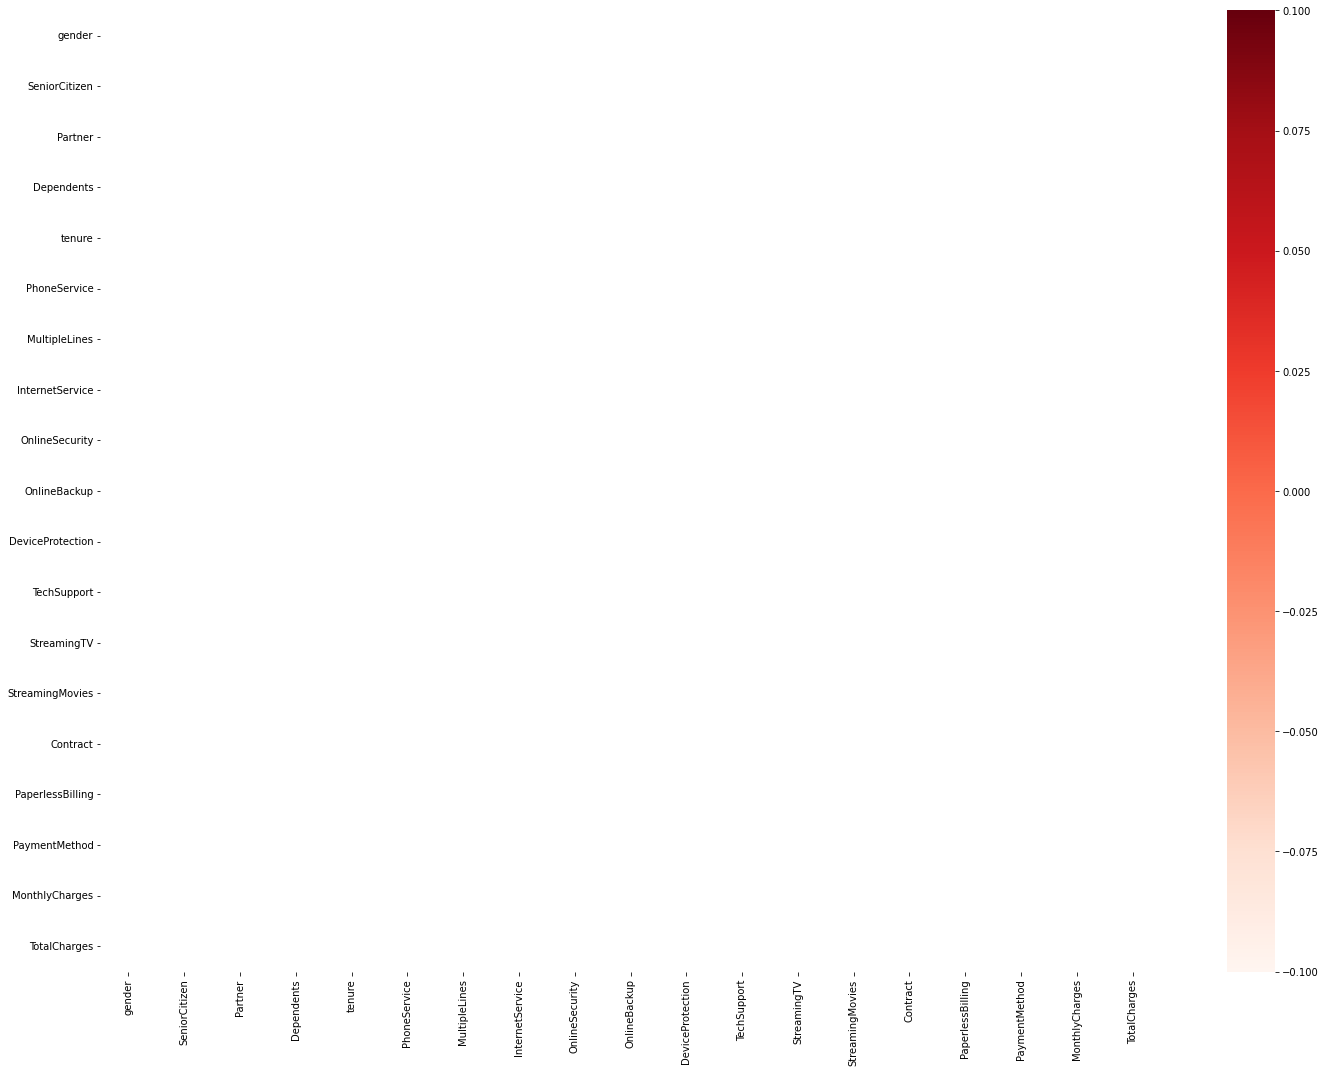

In [115]:
# MultiCollinearity check - Train dataset

# VIF > 5 # Remove   #Regression analysis
# independent variables correlation if high than threshold


# ! By principle in supervised ML any decision which affects the model should be made using only the training set, in order to avoid data leakage.
# ! Following this principle requires the training/test split to always be done first.
# ! LASSO and Ridge regression are advanced forms of regression analysis that can handle multicollinearity.

# v1
threshold = 0.7

X_train_corr = X_train.corr().abs()

# multi collinearited columns
multi_coll_cols_l = [column for column in X_train_corr.columns if any((X_train_corr[column] > threshold) & (X_train_corr[column] < 1))]
multi_coll_cols_l


# v2
threshold = 0.7

corr_matrix = X_train.corr().abs()


filtered_corr_df = corr_matrix[(
    corr_matrix >= threshold) & (corr_matrix < 1)]


plt.figure(figsize=(20, 15))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")

plt.tight_layout()
plt.show()



In [105]:
# multi collinear columns

multi_coll_cols_l

[]

In [116]:
X_train

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        0           0       5             1   
1          1              0        0           1      72             1   
2          1              1        1           0       7             1   
3          1              0        1           0      18             1   
4          0              0        0           0      29             1   
...      ...            ...      ...         ...     ...           ...   
6931       1              0        1           1      72             1   
6932       1              0        1           1      17             1   
6933       0              1        0           0      16             1   
6934       1              0        1           1      46             1   
6935       1              0        0           0       1             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0                1               0             0   
1                 0                2               1             1   
2                 2                1               2             2   
3                 2                1               0             0   
4                 2                0               0             0   
...             ...              ...             ...           ...   
6931              2                2               1             1   
6932              0                1               2             0   
6933              0                1               0             0   
6934              0                2               1             1   
6935              0                0               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            2            0                0         0   
1                    1            1            1                1         2   
2                    0            0            0                2         0   
3                    0            0            2                2         0   
4                    0            0            2                2         1   
...                ...          ...          ...              ...       ...   
6931                 1            1            1                1         2   
6932                 2            0            2                0         0   
6933                 0            1            1                1         0   
6934                 1            1            1                1         2   
6935                 0            2            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1              3             820        3406.0  
1                    0              1              27         954.0  
2                    1              1            1182        5335.0  
3                    1              2            1186        1192.0  
4                    1              1             735        1710.0  
...                ...            ...             ...           ...  
6931                 0              3             114        1417.0  
6932                 1              2            1081         969.0  
6933                 1              1            1151         919.0  
6934                 1              3              31        6410.0  
6935                 1              2             438        4434.0  

[6936 rows x 19 columns]

In [117]:
# palette = ['#008080', '#FF6347', '#E50000', '#D2691E']
# palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']


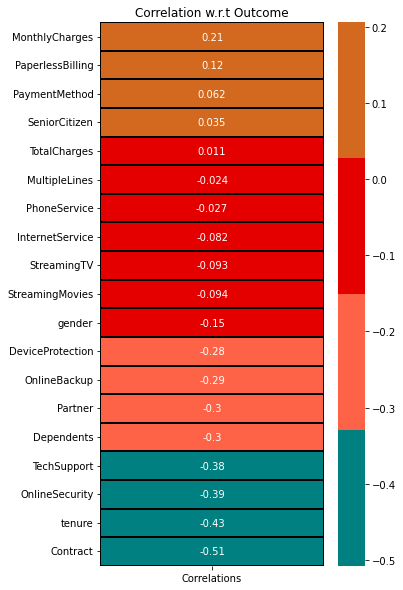

In [118]:
# It is a huge matrix with too many features. We will check the correlation only with respect to Churn.


corr = X_train.corrwith(y_train).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

plt.subplots(figsize=(5, 10))
sns.heatmap(corr, annot=True, cmap=palette, linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t Outcome')
plt.show()


In [119]:
# we know that weak correlation is 0 to 0.5, but the maximum can be 1
# in our case maximum correlation 0.4 and from here if we calculate the correlation as max 0.4 and then the weak correlation is 0 to 0.17

# drop the correlation between the -0.17 and 0.17

corr_list = corr.Correlations[abs(corr.Correlations) < 0.17].index
# corr_list = corr.Correlations[abs(corr.Correlations) < 0.17].to_frame()
corr_list

# X_train.drop(corr_list, axis=1, inplace=True)
# X_train

# X_test.drop(corr_list, axis=1, inplace=True)
# X_test


Index(['PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'TotalCharges',
       'MultipleLines', 'PhoneService', 'InternetService', 'StreamingTV',
       'StreamingMovies', 'gender'],
      dtype='object')

In [120]:
X_train

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        0           0       5             1   
1          1              0        0           1      72             1   
2          1              1        1           0       7             1   
3          1              0        1           0      18             1   
4          0              0        0           0      29             1   
...      ...            ...      ...         ...     ...           ...   
6931       1              0        1           1      72             1   
6932       1              0        1           1      17             1   
6933       0              1        0           0      16             1   
6934       1              0        1           1      46             1   
6935       1              0        0           0       1             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0                1               0             0   
1                 0                2               1             1   
2                 2                1               2             2   
3                 2                1               0             0   
4                 2                0               0             0   
...             ...              ...             ...           ...   
6931              2                2               1             1   
6932              0                1               2             0   
6933              0                1               0             0   
6934              0                2               1             1   
6935              0                0               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            2            0                0         0   
1                    1            1            1                1         2   
2                    0            0            0                2         0   
3                    0            0            2                2         0   
4                    0            0            2                2         1   
...                ...          ...          ...              ...       ...   
6931                 1            1            1                1         2   
6932                 2            0            2                0         0   
6933                 0            1            1                1         0   
6934                 1            1            1                1         2   
6935                 0            2            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1              3             820        3406.0  
1                    0              1              27         954.0  
2                    1              1            1182        5335.0  
3                    1              2            1186        1192.0  
4                    1              1             735        1710.0  
...                ...            ...             ...           ...  
6931                 0              3             114        1417.0  
6932                 1              2            1081         969.0  
6933                 1              1            1151         919.0  
6934                 1              3              31        6410.0  
6935                 1              2             438        4434.0  

[6936 rows x 19 columns]

In [121]:
# check if there are any multi collinear columns that are not in correlation with dependent variable(churn)

# len(multi_coll_cols_l)
# len(corr_list)

arrIsExists = np.in1d(multi_coll_cols_l, corr_list)
arr_diff_cols = []

for id, col in enumerate(multi_coll_cols_l):
    if (arrIsExists[id] == False):
        # print(id)
        # print(multi_coll_cols_l[id])
        arr_diff_cols.append(multi_coll_cols_l[id])

# ! columns that are correlated with dependent variable(at least weak correlation) and multicorrelated with each other
arr_diff_cols
# len(arr_diff_cols)

[]

In [122]:
# numerical_cols = raw_df.select_dtypes([int, float])
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [123]:
l = list(X_train.dtypes.index)

categorical_cols = [col for col in l if col not in numerical_cols]

categorical_cols


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

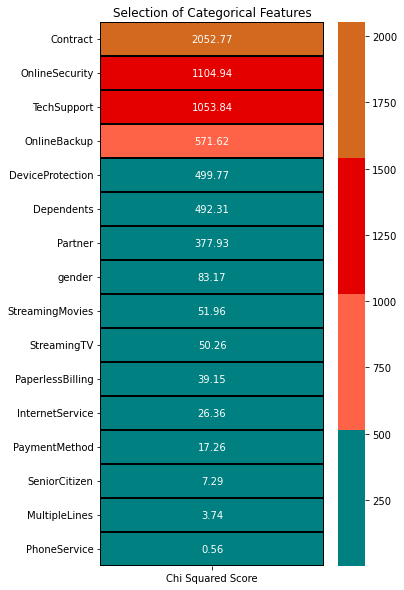

In [124]:
# Feature Selection for Categorical Features

from src import SelectKBest, chi2
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2, mutual_info_classif



# Chi-Squared Test (between categorical and categorical)

features = X_train[categorical_cols]
target = y_train

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(
    data=fit.scores_,
    index=categorical_cols,
    columns=['Chi Squared Score']
)


plt.subplots(figsize=(5, 10))
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'),
            annot=True, cmap=palette, linewidths=0.4, linecolor='black', fmt='.2f')

plt.title('Selection of Categorical Features')
plt.show()


In [125]:
# v2
# ?

# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for grid search
# param_grid = {'k': range(5, 10)}

# # Create a KNN classifier

# # Create a grid search object with cross-validation
# grid_search = GridSearchCV(SelectKBest(
#     score_func=chi2), param_grid=param_grid, cv=5, scoring='recall')

# # Fit the grid search object to the data
# grid_search.fit(X_train, y_train)

# # Print the best value of k
# print("Best value of k:", grid_search.best_params_['k'])


In [126]:
# # Feature Selection for Categorical Features

# from src import SelectKBest, chi2, mutual_info_classif

# # from sklearn.feature_selection import SelectKBest
# # from sklearn.feature_selection import chi2, mutual_info_classif

# # Chi-Squared Test

# features = X_train[categorical_cols]
# target = y_train

# best_features = SelectKBest(score_func=chi2, k=3)
# fit = best_features.fit(features, target)
# # fit.scores_

# featureScores = pd.DataFrame(
#     data=fit.scores_,
#     index=categorical_cols,
#     columns=['Chi Squared Score']
# )


# plt.subplots(figsize=(5, 10))
# sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'),
#             annot=True, cmap=palette, linewidths=0.4, linecolor='black', fmt='.2f')

# plt.title('Selection of Categorical Features')
# plt.show()


In [127]:
# Model III: Chi-squared Cutoff = 1.2 * DF(degrees of freedom) + 8

# 1.2 * (34+8) = 50
# threshold = 50 # base
threshold = 400 # over
# threshold = 20 # under


chi_sq_feauters = featureScores['Chi Squared Score'][featureScores['Chi Squared Score'] < threshold].index
X_train.drop(chi_sq_feauters, axis=1, inplace=True)

X_test.drop(chi_sq_feauters, axis=1, inplace=True)

X_train


Dependents  tenure  OnlineSecurity  OnlineBackup  DeviceProtection  \
0              0       5               0             0                 0   
1              1      72               1             1                 1   
2              0       7               2             2                 0   
3              0      18               0             0                 0   
4              0      29               0             0                 0   
...          ...     ...             ...           ...               ...   
6931           1      72               1             1                 1   
6932           1      17               2             0                 2   
6933           0      16               0             0                 0   
6934           1      46               1             1                 1   
6935           0       1               2             0                 0   

      TechSupport  Contract  MonthlyCharges  TotalCharges  
0               2         0             820        3406.0  
1               1         2              27         954.0  
2               0         0            1182        5335.0  
3               0         0            1186        1192.0  
4               0         1             735        1710.0  
...           ...       ...             ...           ...  
6931            1         2             114        1417.0  
6932            0         0            1081         969.0  
6933            1         0            1151         919.0  
6934            1         2              31        6410.0  
6935            2         0             438        4434.0  

[6936 rows x 9 columns]

In [128]:
for f in chi_sq_feauters:
    categorical_cols.remove(f)

categorical_cols

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'Contract']

In [129]:
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [130]:
temp_list = [x for x in numerical_cols if x not in X_train.columns]

for x in temp_list:
    numerical_cols.remove(x)

numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [131]:
X_train

Dependents  tenure  OnlineSecurity  OnlineBackup  DeviceProtection  \
0              0       5               0             0                 0   
1              1      72               1             1                 1   
2              0       7               2             2                 0   
3              0      18               0             0                 0   
4              0      29               0             0                 0   
...          ...     ...             ...           ...               ...   
6931           1      72               1             1                 1   
6932           1      17               2             0                 2   
6933           0      16               0             0                 0   
6934           1      46               1             1                 1   
6935           0       1               2             0                 0   

      TechSupport  Contract  MonthlyCharges  TotalCharges  
0               2         0             820        3406.0  
1               1         2              27         954.0  
2               0         0            1182        5335.0  
3               0         0            1186        1192.0  
4               0         1             735        1710.0  
...           ...       ...             ...           ...  
6931            1         2             114        1417.0  
6932            0         0            1081         969.0  
6933            1         0            1151         919.0  
6934            1         2              31        6410.0  
6935            2         0             438        4434.0  

[6936 rows x 9 columns]

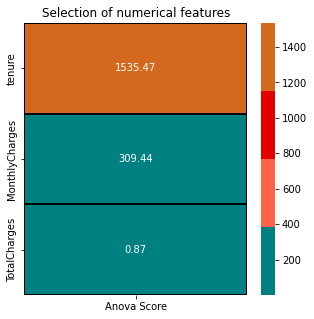

In [132]:
# Feature Selection for Numerical Features

from src import f_classif
# from sklearn.feature_selection import f_classif


# ANOVA Test


features = X_train[numerical_cols]
target = y_train

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(
    data=fit.scores_,
    index=numerical_cols,
    columns=['Anova Score']
)

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='Anova Score'),
            annot=True, cmap=palette, linewidths=0.4, linecolor='black', fmt='.2f')

plt.title('Selection of numerical features')

plt.show()


In [133]:
X_train

Dependents  tenure  OnlineSecurity  OnlineBackup  DeviceProtection  \
0              0       5               0             0                 0   
1              1      72               1             1                 1   
2              0       7               2             2                 0   
3              0      18               0             0                 0   
4              0      29               0             0                 0   
...          ...     ...             ...           ...               ...   
6931           1      72               1             1                 1   
6932           1      17               2             0                 2   
6933           0      16               0             0                 0   
6934           1      46               1             1                 1   
6935           0       1               2             0                 0   

      TechSupport  Contract  MonthlyCharges  TotalCharges  
0               2         0             820        3406.0  
1               1         2              27         954.0  
2               0         0            1182        5335.0  
3               0         0            1186        1192.0  
4               0         1             735        1710.0  
...           ...       ...             ...           ...  
6931            1         2             114        1417.0  
6932            0         0            1081         969.0  
6933            1         0            1151         919.0  
6934            1         2              31        6410.0  
6935            2         0             438        4434.0  

[6936 rows x 9 columns]

In [134]:
X_test

Dependents  tenure  OnlineSecurity  OnlineBackup  DeviceProtection  \
0              0      41               0             1                 1   
1              1      48               1             1                 1   
2              0       4               0             0                 0   
3              0      64               2             0                 0   
4              0      10               1             0                 0   
...          ...     ...             ...           ...               ...   
2319           0      48               2             0                 0   
2320           0      11               0             0                 0   
2321           0      65               0             2                 2   
2322           0       1               1             1                 1   
2323           0       1               0             0                 0   

      TechSupport  Contract  MonthlyCharges  TotalCharges  
0               0         0            1059          4801  
1               1         2              20          6287  
2               0         0             323          1595  
3               0         0             778          4034  
4               0         0             899          6378  
...           ...       ...             ...           ...  
2319            2         1             555          2581  
2320            0         0             929          6445  
2321            2         0            1453          5472  
2322            1         0              28          1493  
2323            0         0             466          4562  

[2324 rows x 9 columns]

In [135]:
# We have 2 options for data scaling:
# 1) Normalization 2) Standardization.

# As most of the algorithms assume the data to be normally(Gaussian) distributed,
# Normalization is done for features whose data does not display normal distribution and
# Standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.

# Normalization : tenure, MonthlyCharges and TotalCharges features are normalized as they displayed a right skewed and bimodal data distribution.


In [136]:
# 5.2.1 Feature Normalizing

# ! It is important to note that MinMax scaling preserves the shape of the original distribution.


from src import MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler


minmax_scaler = MinMaxScaler()

# v1 (dynamic)
X_train.drop(numerical_cols, axis=1)
for col in numerical_cols:
    X_train[col] = minmax_scaler.fit_transform(X_train[[col]])
    X_test[col] = minmax_scaler.transform(X_test[[col]])


# v2
# X_train.drop(numerical_cols.columns, axis=1)
# X_train['tenure'] = minmax_scaler.fit_transform(X_train[['tenure']])
# X_train['MonthlyCharges'] = minmax_scaler.fit_transform(X_train[['MonthlyCharges']])
# X_train['TotalCharges'] = minmax_scaler.fit_transform(X_train[['TotalCharges']])
# X_test['tenure'] = minmax_scaler.transform(X_test[['tenure']])
# X_test['MonthlyCharges'] = minmax_scaler.transform(X_test[['MonthlyCharges']])
# X_test['TotalCharges'] = minmax_scaler.transform(X_test[['TotalCharges']])

X_train


Dependents    tenure  OnlineSecurity  OnlineBackup  DeviceProtection  \
0              0  0.069444               0             0                 0   
1              1  1.000000               1             1                 1   
2              0  0.097222               2             2                 0   
3              0  0.250000               0             0                 0   
4              0  0.402778               0             0                 0   
...          ...       ...             ...           ...               ...   
6931           1  1.000000               1             1                 1   
6932           1  0.236111               2             0                 2   
6933           0  0.222222               0             0                 0   
6934           1  0.638889               1             1                 1   
6935           0  0.013889               2             0                 0   

      TechSupport  Contract  MonthlyCharges  TotalCharges  
0               2         0        0.517677      0.521519  
1               1         2        0.017045      0.145964  
2               0         0        0.746212      0.816970  
3               0         0        0.748737      0.182417  
4               0         1        0.464015      0.261755  
...           ...       ...             ...           ...  
6931            1         2        0.071970      0.216879  
6932            0         0        0.682449      0.148262  
6933            1         0        0.726641      0.140603  
6934            1         2        0.019571      0.981620  
6935            2         0        0.276515      0.678971  

[6936 rows x 9 columns]

In [137]:
# # 5.2.2 Feature scaling

# # ! It is important to note that Standard scaling does not change the shape of the distribution, but shifts its mean and scales its variance. Mean 0 and stdev 1

# from sklearn.preprocessing import StandardScaler

# stand_scaler = StandardScaler()
# X_train_scaled = stand_scaler.fit_transform(X_train[list(numerical_cols)])
# X_test_scaled = stand_scaler.transform(X_test[list(numerical_cols)])

# X_train.drop(numerical_cols.columns, axis=1)
# for col in numerical_cols:
#     X_train[col] = stand_scaler.fit_transform(X_train[[col]])
#     X_test[col] = stand_scaler.transform(X_test[[col]])

# X_train


In [138]:
# # Feature normalization / transformation
# # technique which also changed shape of the data to normal distribution

# from scipy.stats import boxcox

# # Apply Box-Cox transformation to the training set
# X_train_transformed, lambda_ = boxcox(X_train)

# # Use the same lambda to transform the testing set
# X_test_transformed = boxcox(X_test, lambda_)


Dependents    tenure  OnlineSecurity  OnlineBackup  DeviceProtection  \
0              0  0.069444               0             0                 0   
1              1  1.000000               1             1                 1   
2              0  0.097222               2             2                 0   
3              0  0.250000               0             0                 0   
4              0  0.402778               0             0                 0   
...          ...       ...             ...           ...               ...   
6931           1  1.000000               1             1                 1   
6932           1  0.236111               2             0                 2   
6933           0  0.222222               0             0                 0   
6934           1  0.638889               1             1                 1   
6935           0  0.013889               2             0                 0   

      TechSupport  Contract  MonthlyCharges  TotalCharges  
0               2         0        0.517677      0.521519  
1               1         2        0.017045      0.145964  
2               0         0        0.746212      0.816970  
3               0         0        0.748737      0.182417  
4               0         1        0.464015      0.261755  
...           ...       ...             ...           ...  
6931            1         2        0.071970      0.216879  
6932            0         0        0.682449      0.148262  
6933            1         0        0.726641      0.140603  
6934            1         2        0.019571      0.981620  
6935            2         0        0.276515      0.678971  

[6936 rows x 9 columns]

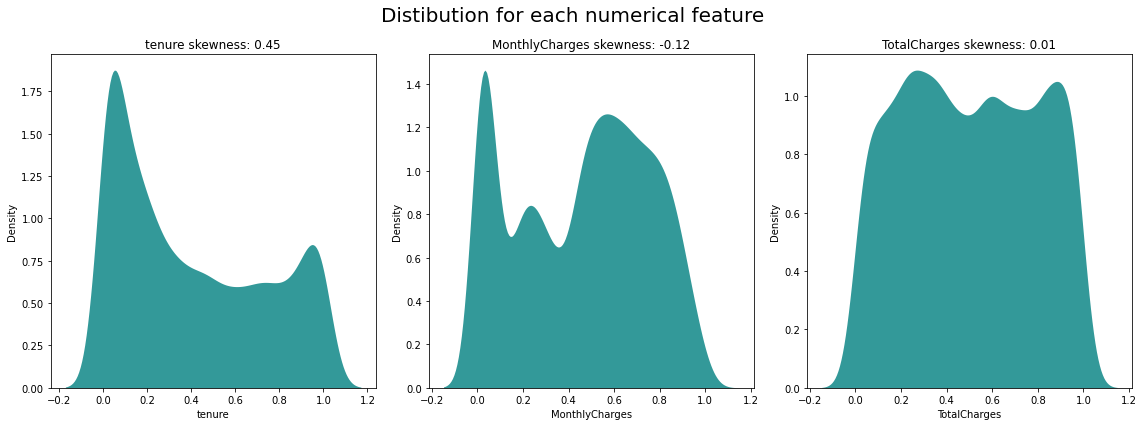

In [139]:
#  | EDA


# Checking for distributions AFTER normalization and/or standardization
# If applied minmax or standard scaling it will not change the distribution

# def distribution2(data, cols_list, cols_c, rows_c, supTitle):
#     figs, axss = plt.subplots(
#         # data=data,
#         nrows=rows_c,
#         ncols=cols_c,
#         figsize=(16, 6)
#     )

#     # seting figure title
#     figs.suptitle(supTitle, size=20)

#     # plot for each given column in data
#     for i, col in enumerate(cols_list):
#         sns.kdeplot(
#             data=data[col],
#             ax=axss[i],
#             fill=True,  # fill inside
#             alpha=0.8,  # transparency level
#             linewidth=0,
#             color='#008080'
#         )

#         axss[i].set_title(
#             f'{col} skewness: ' + str(
#                 round((data[col].skew(axis=0, skipna=True)), 2)
#             ))


# calling plot function
numeric_kde_visualization(data=X_train,
                          cols_list=numerical_cols,
                          rows_c=1,
                          cols_c=3,
                          supTitle='Distibution for each numerical feature')

plt.tight_layout()  

X_train


In [140]:
categorical_cols

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'Contract']

In [141]:
# Encoding of categorical variables/features
# after encoding:  male/female ==> 0/1

from src import OneHotEncoder, make_column_transformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer

# if needed, run this drop func. only one time when restarting the model
# X_train[categorical_cols].drop('Churn', axis=1, inplace=True)

transformer = make_column_transformer(
    (
        OneHotEncoder(handle_unknown='ignore'),
        categorical_cols
    )
)

# transformer


In [142]:
# Transforming Train dataframe by using one hot encoding

transformed = transformer.fit_transform(X_train)
transformed

# Transformating back

transformed_df = pd.DataFrame(
    transformed, columns=transformer.get_feature_names_out())
transformed_df

# One-hot encoding removed index. Let's put it back:
transformed_df.index = X_train.index
transformed_df


# Joining tables
X_train = pd.concat([X_train, transformed_df], axis=1)
X_train

# Dropping categorical columns
X_train.drop(categorical_cols, axis=1, inplace=True)
X_train


tenure  MonthlyCharges  TotalCharges  onehotencoder__Dependents_0  \
0     0.069444        0.517677      0.521519                          1.0   
1     1.000000        0.017045      0.145964                          0.0   
2     0.097222        0.746212      0.816970                          1.0   
3     0.250000        0.748737      0.182417                          1.0   
4     0.402778        0.464015      0.261755                          1.0   
...        ...             ...           ...                          ...   
6931  1.000000        0.071970      0.216879                          0.0   
6932  0.236111        0.682449      0.148262                          0.0   
6933  0.222222        0.726641      0.140603                          1.0   
6934  0.638889        0.019571      0.981620                          0.0   
6935  0.013889        0.276515      0.678971                          1.0   

      onehotencoder__Dependents_1  onehotencoder__OnlineSecurity_0  \
0                             0.0                              1.0   
1                             1.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              1.0   
4                             0.0                              1.0   
...                           ...                              ...   
6931                          1.0                              0.0   
6932                          1.0                              0.0   
6933                          0.0                              1.0   
6934                          1.0                              0.0   
6935                          0.0                              0.0   

      onehotencoder__OnlineSecurity_1  onehotencoder__OnlineSecurity_2  \
0                                 0.0                              0.0   
1                                 1.0                              0.0   
2                                 0.0                              1.0   
3                                 0.0                              0.0   
4                                 0.0                              0.0   
...                               ...                              ...   
6931                              1.0                              0.0   
6932                              0.0                              1.0   
6933                              0.0                              0.0   
6934                              1.0                              0.0   
6935                              0.0                              1.0   

      onehotencoder__OnlineBackup_0  onehotencoder__OnlineBackup_1  \
0                               1.0                            0.0   
1                               0.0                            1.0   
2                               0.0                            0.0   
3                               1.0                            0.0   
4                               1.0                            0.0   
...                             ...                            ...   
6931                            0.0                            1.0   
6932                            1.0                            0.0   
6933                            1.0                            0.0   
6934                            0.0                            1.0   
6935                            1.0                            0.0   

      onehotencoder__OnlineBackup_2  onehotencoder__DeviceProtection_0  \
0                               0.0                                1.0   
1                               0.0                                0.0   
2                               1.0                                1.0   
3                               0.0                                1.0   
4                               0.0                                1.0   
...                             ...                                .

In [143]:
# Transforming Test dataframe by using one hot encoding

transformed = transformer.transform(X_test)

# Transformating back (array to dataframe)

transformed_df = pd.DataFrame(
    transformed, columns=transformer.get_feature_names_out())

# One-hot encoding removed index. Let's put it back:

transformed_df.index = X_test.index


# Joining tables

X_test = pd.concat([X_test, transformed_df], axis=1)

# Dropping categorical columns from original dataframe

X_test.drop(categorical_cols, axis=1, inplace=True)
X_test


tenure  MonthlyCharges  TotalCharges  onehotencoder__Dependents_0  \
0     0.569444        0.668561      0.735181                          1.0   
1     0.666667        0.012626      0.962781                          0.0   
2     0.055556        0.203914      0.244142                          1.0   
3     0.888889        0.491162      0.617706                          1.0   
4     0.138889        0.567551      0.976719                          1.0   
...        ...             ...           ...                          ...   
2319  0.666667        0.350379      0.395160                          1.0   
2320  0.152778        0.586490      0.986981                          1.0   
2321  0.902778        0.917298      0.837954                          1.0   
2322  0.013889        0.017677      0.228519                          1.0   
2323  0.013889        0.294192      0.698576                          1.0   

      onehotencoder__Dependents_1  onehotencoder__OnlineSecurity_0  \
0                             0.0                              1.0   
1                             1.0                              0.0   
2                             0.0                              1.0   
3                             0.0                              0.0   
4                             0.0                              0.0   
...                           ...                              ...   
2319                          0.0                              0.0   
2320                          0.0                              1.0   
2321                          0.0                              1.0   
2322                          0.0                              0.0   
2323                          0.0                              1.0   

      onehotencoder__OnlineSecurity_1  onehotencoder__OnlineSecurity_2  \
0                                 0.0                              0.0   
1                                 1.0                              0.0   
2                                 0.0                              0.0   
3                                 0.0                              1.0   
4                                 1.0                              0.0   
...                               ...                              ...   
2319                              0.0                              1.0   
2320                              0.0                              0.0   
2321                              0.0                              0.0   
2322                              1.0                              0.0   
2323                              0.0                              0.0   

      onehotencoder__OnlineBackup_0  onehotencoder__OnlineBackup_1  \
0                               0.0                            1.0   
1                               0.0                            1.0   
2                               1.0                            0.0   
3                               1.0                            0.0   
4                               1.0                            0.0   
...                             ...                            ...   
2319                            1.0                            0.0   
2320                            1.0                            0.0   
2321                            0.0                            0.0   
2322                            0.0                            1.0   
2323                            1.0                            0.0   

      onehotencoder__OnlineBackup_2  onehotencoder__DeviceProtection_0  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                1.0   
3                               0.0                                1.0   
4                               0.0                                1.0   
...                             ...                                .

In [144]:
X_train


tenure  MonthlyCharges  TotalCharges  onehotencoder__Dependents_0  \
0     0.069444        0.517677      0.521519                          1.0   
1     1.000000        0.017045      0.145964                          0.0   
2     0.097222        0.746212      0.816970                          1.0   
3     0.250000        0.748737      0.182417                          1.0   
4     0.402778        0.464015      0.261755                          1.0   
...        ...             ...           ...                          ...   
6931  1.000000        0.071970      0.216879                          0.0   
6932  0.236111        0.682449      0.148262                          0.0   
6933  0.222222        0.726641      0.140603                          1.0   
6934  0.638889        0.019571      0.981620                          0.0   
6935  0.013889        0.276515      0.678971                          1.0   

      onehotencoder__Dependents_1  onehotencoder__OnlineSecurity_0  \
0                             0.0                              1.0   
1                             1.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              1.0   
4                             0.0                              1.0   
...                           ...                              ...   
6931                          1.0                              0.0   
6932                          1.0                              0.0   
6933                          0.0                              1.0   
6934                          1.0                              0.0   
6935                          0.0                              0.0   

      onehotencoder__OnlineSecurity_1  onehotencoder__OnlineSecurity_2  \
0                                 0.0                              0.0   
1                                 1.0                              0.0   
2                                 0.0                              1.0   
3                                 0.0                              0.0   
4                                 0.0                              0.0   
...                               ...                              ...   
6931                              1.0                              0.0   
6932                              0.0                              1.0   
6933                              0.0                              0.0   
6934                              1.0                              0.0   
6935                              0.0                              1.0   

      onehotencoder__OnlineBackup_0  onehotencoder__OnlineBackup_1  \
0                               1.0                            0.0   
1                               0.0                            1.0   
2                               0.0                            0.0   
3                               1.0                            0.0   
4                               1.0                            0.0   
...                             ...                            ...   
6931                            0.0                            1.0   
6932                            1.0                            0.0   
6933                            1.0                            0.0   
6934                            0.0                            1.0   
6935                            1.0                            0.0   

      onehotencoder__OnlineBackup_2  onehotencoder__DeviceProtection_0  \
0                               0.0                                1.0   
1                               0.0                                0.0   
2                               1.0                                1.0   
3                               0.0                                1.0   
4                               0.0                                1.0   
...                             ...                                .

In [145]:
X_test

tenure  MonthlyCharges  TotalCharges  onehotencoder__Dependents_0  \
0     0.569444        0.668561      0.735181                          1.0   
1     0.666667        0.012626      0.962781                          0.0   
2     0.055556        0.203914      0.244142                          1.0   
3     0.888889        0.491162      0.617706                          1.0   
4     0.138889        0.567551      0.976719                          1.0   
...        ...             ...           ...                          ...   
2319  0.666667        0.350379      0.395160                          1.0   
2320  0.152778        0.586490      0.986981                          1.0   
2321  0.902778        0.917298      0.837954                          1.0   
2322  0.013889        0.017677      0.228519                          1.0   
2323  0.013889        0.294192      0.698576                          1.0   

      onehotencoder__Dependents_1  onehotencoder__OnlineSecurity_0  \
0                             0.0                              1.0   
1                             1.0                              0.0   
2                             0.0                              1.0   
3                             0.0                              0.0   
4                             0.0                              0.0   
...                           ...                              ...   
2319                          0.0                              0.0   
2320                          0.0                              1.0   
2321                          0.0                              1.0   
2322                          0.0                              0.0   
2323                          0.0                              1.0   

      onehotencoder__OnlineSecurity_1  onehotencoder__OnlineSecurity_2  \
0                                 0.0                              0.0   
1                                 1.0                              0.0   
2                                 0.0                              0.0   
3                                 0.0                              1.0   
4                                 1.0                              0.0   
...                               ...                              ...   
2319                              0.0                              1.0   
2320                              0.0                              0.0   
2321                              0.0                              0.0   
2322                              1.0                              0.0   
2323                              0.0                              0.0   

      onehotencoder__OnlineBackup_0  onehotencoder__OnlineBackup_1  \
0                               0.0                            1.0   
1                               0.0                            1.0   
2                               1.0                            0.0   
3                               1.0                            0.0   
4                               1.0                            0.0   
...                             ...                            ...   
2319                            1.0                            0.0   
2320                            1.0                            0.0   
2321                            0.0                            0.0   
2322                            0.0                            1.0   
2323                            1.0                            0.0   

      onehotencoder__OnlineBackup_2  onehotencoder__DeviceProtection_0  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                1.0   
3                               0.0                                1.0   
4                               0.0                                1.0   
...                             ...                                .

In [146]:
# 6. Model Building

from src import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from src import classification_report

# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
# from sklearn.metrics import classification_report


# 6.1 Feature importance

X_train


tenure  MonthlyCharges  TotalCharges  onehotencoder__Dependents_0  \
0     0.069444        0.517677      0.521519                          1.0   
1     1.000000        0.017045      0.145964                          0.0   
2     0.097222        0.746212      0.816970                          1.0   
3     0.250000        0.748737      0.182417                          1.0   
4     0.402778        0.464015      0.261755                          1.0   
...        ...             ...           ...                          ...   
6931  1.000000        0.071970      0.216879                          0.0   
6932  0.236111        0.682449      0.148262                          0.0   
6933  0.222222        0.726641      0.140603                          1.0   
6934  0.638889        0.019571      0.981620                          0.0   
6935  0.013889        0.276515      0.678971                          1.0   

      onehotencoder__Dependents_1  onehotencoder__OnlineSecurity_0  \
0                             0.0                              1.0   
1                             1.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              1.0   
4                             0.0                              1.0   
...                           ...                              ...   
6931                          1.0                              0.0   
6932                          1.0                              0.0   
6933                          0.0                              1.0   
6934                          1.0                              0.0   
6935                          0.0                              0.0   

      onehotencoder__OnlineSecurity_1  onehotencoder__OnlineSecurity_2  \
0                                 0.0                              0.0   
1                                 1.0                              0.0   
2                                 0.0                              1.0   
3                                 0.0                              0.0   
4                                 0.0                              0.0   
...                               ...                              ...   
6931                              1.0                              0.0   
6932                              0.0                              1.0   
6933                              0.0                              0.0   
6934                              1.0                              0.0   
6935                              0.0                              1.0   

      onehotencoder__OnlineBackup_0  onehotencoder__OnlineBackup_1  \
0                               1.0                            0.0   
1                               0.0                            1.0   
2                               0.0                            0.0   
3                               1.0                            0.0   
4                               1.0                            0.0   
...                             ...                            ...   
6931                            0.0                            1.0   
6932                            1.0                            0.0   
6933                            1.0                            0.0   
6934                            0.0                            1.0   
6935                            1.0                            0.0   

      onehotencoder__OnlineBackup_2  onehotencoder__DeviceProtection_0  \
0                               0.0                                1.0   
1                               0.0                                0.0   
2                               1.0                                1.0   
3                               0.0                                1.0   
4                               0.0                                1.0   
...                             ...                                .

In [147]:
# Setting up new feature names

from src.helpers import remove_txt_from_features

# def remove_txt_from_features(txt, features):
#     updated_features_list = []

#     for i, f in enumerate(features):
#         if(txt in f):
#             t_txt = f.replace(txt, '')
#             updated_features_list.append(t_txt)
#             # print(updated_features_list)

#             if(len(t_txt.split(' ')) > 1):
#                 # print(t_txt)
#                 # print(updated_features_list.index(t_txt))
#                 txt_id = updated_features_list.index(t_txt)

#                 updated_features_list.pop(txt_id)
#                 updated_features_list.insert(
#                     txt_id,
#                     t_txt.replace(' ', "_").title()
#                 ),
#         else:
#             updated_features_list.append(f)

#     # print(updated_features_list)
#     return updated_features_list


# remove_txt_from_features('onehotencoder__', X_train.columns)
X_train.columns = remove_txt_from_features('onehotencoder__', X_train.columns)
X_train.columns = remove_txt_from_features('_(Automatic)', X_train.columns)
X_train.columns


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Dependents_0',
       'Dependents_1', 'OnlineSecurity_0', 'OnlineSecurity_1',
       'OnlineSecurity_2', 'OnlineBackup_0', 'OnlineBackup_1',
       'OnlineBackup_2', 'DeviceProtection_0', 'DeviceProtection_1',
       'DeviceProtection_2', 'TechSupport_0', 'TechSupport_1', 'TechSupport_2',
       'Contract_0', 'Contract_1', 'Contract_2'],
      dtype='object')

In [148]:
X_test.columns = remove_txt_from_features('onehotencoder__', X_test.columns)
X_test.columns = remove_txt_from_features('_(Automatic)', X_test.columns)
X_test.columns
# len(X_test.columns)


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Dependents_0',
       'Dependents_1', 'OnlineSecurity_0', 'OnlineSecurity_1',
       'OnlineSecurity_2', 'OnlineBackup_0', 'OnlineBackup_1',
       'OnlineBackup_2', 'DeviceProtection_0', 'DeviceProtection_1',
       'DeviceProtection_2', 'TechSupport_0', 'TechSupport_1', 'TechSupport_2',
       'Contract_0', 'Contract_1', 'Contract_2'],
      dtype='object')

In [149]:
# after columns changed (train data)

X_train.head()


tenure  MonthlyCharges  TotalCharges  Dependents_0  Dependents_1  \
0  0.069444        0.517677      0.521519           1.0           0.0   
1  1.000000        0.017045      0.145964           0.0           1.0   
2  0.097222        0.746212      0.816970           1.0           0.0   
3  0.250000        0.748737      0.182417           1.0           0.0   
4  0.402778        0.464015      0.261755           1.0           0.0   

   OnlineSecurity_0  OnlineSecurity_1  OnlineSecurity_2  OnlineBackup_0  \
0               1.0               0.0               0.0             1.0   
1               0.0               1.0               0.0             0.0   
2               0.0               0.0               1.0             0.0   
3               1.0               0.0               0.0             1.0   
4               1.0               0.0               0.0             1.0   

   OnlineBackup_1  OnlineBackup_2  DeviceProtection_0  DeviceProtection_1  \
0             0.0             0.0                 1.0                 0.0   
1             1.0             0.0                 0.0                 1.0   
2             0.0             1.0                 1.0                 0.0   
3             0.0             0.0                 1.0                 0.0   
4             0.0             0.0                 1.0                 0.0   

   DeviceProtection_2  TechSupport_0  TechSupport_1  TechSupport_2  \
0                 0.0            0.0            0.0            1.0   
1                 0.0            0.0            1.0            0.0   
2                 0.0            1.0            0.0            0.0   
3                 0.0            1.0            0.0            0.0   
4                 0.0            1.0            0.0            0.0   

   Contract_0  Contract_1  Contract_2  
0         1.0         0.0         0.0  
1         0.0         0.0         1.0  
2         1.0         0.0         0.0  
3         1.0         0.0         0.0  
4         0.0         1.0         0.0

In [150]:
# after columns changed (test data)

X_test.head()


tenure  MonthlyCharges  TotalCharges  Dependents_0  Dependents_1  \
0  0.569444        0.668561      0.735181           1.0           0.0   
1  0.666667        0.012626      0.962781           0.0           1.0   
2  0.055556        0.203914      0.244142           1.0           0.0   
3  0.888889        0.491162      0.617706           1.0           0.0   
4  0.138889        0.567551      0.976719           1.0           0.0   

   OnlineSecurity_0  OnlineSecurity_1  OnlineSecurity_2  OnlineBackup_0  \
0               1.0               0.0               0.0             0.0   
1               0.0               1.0               0.0             0.0   
2               1.0               0.0               0.0             1.0   
3               0.0               0.0               1.0             1.0   
4               0.0               1.0               0.0             1.0   

   OnlineBackup_1  OnlineBackup_2  DeviceProtection_0  DeviceProtection_1  \
0             1.0             0.0                 0.0                 1.0   
1             1.0             0.0                 0.0                 1.0   
2             0.0             0.0                 1.0                 0.0   
3             0.0             0.0                 1.0                 0.0   
4             0.0             0.0                 1.0                 0.0   

   DeviceProtection_2  TechSupport_0  TechSupport_1  TechSupport_2  \
0                 0.0            1.0            0.0            0.0   
1                 0.0            0.0            1.0            0.0   
2                 0.0            1.0            0.0            0.0   
3                 0.0            1.0            0.0            0.0   
4                 0.0            1.0            0.0            0.0   

   Contract_0  Contract_1  Contract_2  
0         1.0         0.0         0.0  
1         0.0         0.0         1.0  
2         1.0         0.0         0.0  
3         1.0         0.0         0.0  
4         1.0         0.0         0.0

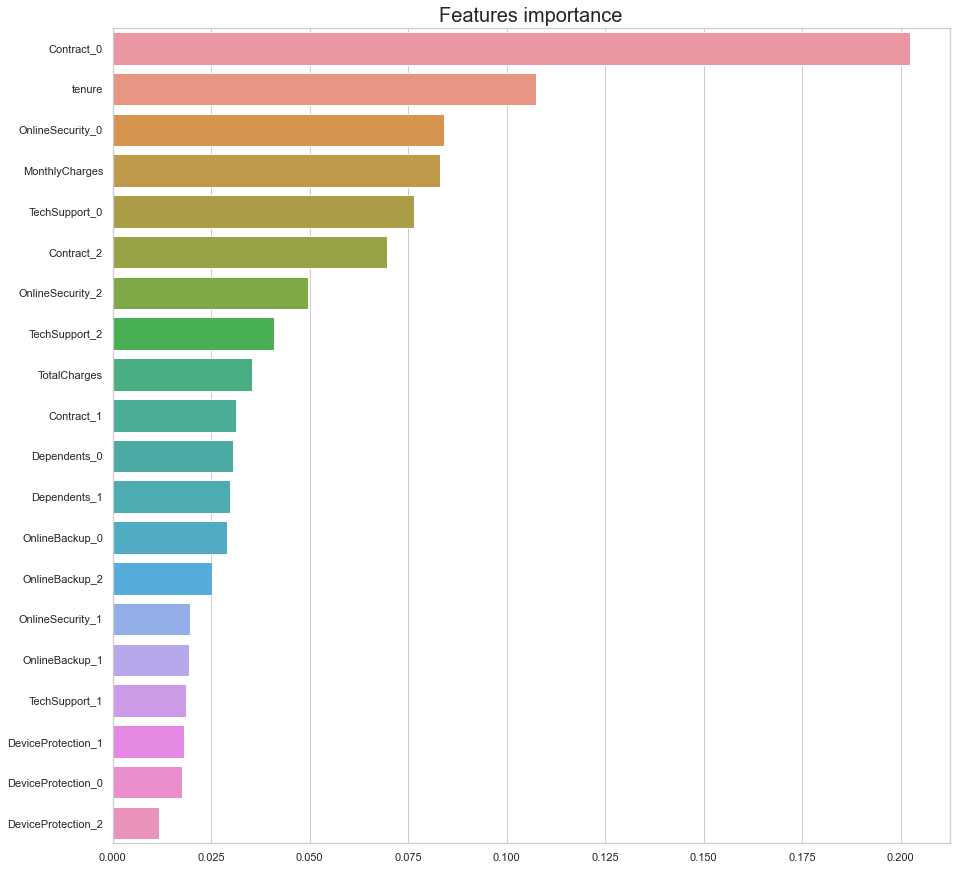

In [151]:
# Feature Importance classifier

from src import RandomForestClassifier
# from sklearn.ensemble import RandomForestClassifier


rfclassifier = RandomForestClassifier(
    max_depth=8,
    min_samples_leaf=3,
    min_samples_split=3,
    n_estimators=5000,  # number of trees
    random_state=12
)

rfclassifier = rfclassifier.fit(X_train, y_train)


# importance of the features in the train data descending order
feature_importance = pd.Series(data=rfclassifier.feature_importances_,
                               index=X_train.columns).sort_values(ascending=False)



# feature_importance

# visualize the importance of the features
sns.set(style="whitegrid", color_codes=True)

plt.figure(figsize=(15, 15))

plt.title("Features importance", size=20)

ax = sns.barplot(
    x=feature_importance.values,
    y=feature_importance.index,
    # palette=palette,
    orient='h'  # display horizontaly
)


In [152]:
# 6.2 Baseline - Random Forest

# Bagging Technique

rfc = RandomForestClassifier(random_state=12)


rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(y_pred[:11])


[1 0 1 0 1 1 0 1 0 0 0]


[[1071  223]
 [ 244  786]]


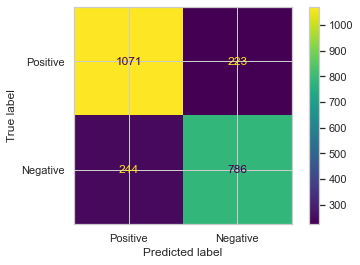

In [153]:
rfc_recall = recall_score(y_test, y_pred)
rfc_precision = precision_score(y_test, y_pred)
rfc_f1 = f1_score(y_test, y_pred)
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_roc_auc = roc_auc_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# sns.heatmap(conf_matrix, annot=True)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=['Positive', 'Negative'])
plt.show()


In [154]:
# X axis => predicted => (positive/negative)
# Y axis => actual => (True/False)


# in our case we can predict actual 1154 No(True Positive) values correctly

# in our case we can predict actual 212 Yes(False Negative) values correctly

# but we cannot predict actual 137 / 255 values correctly (True negative / False positive)


# by calculating the scores we can create classification report:


# ALL SCORES IMG => https://www.researchgate.net/publication/347447352/figure/fig3/AS:970048604741634@1608289018974/Performance-measurement-TP-TN-FP-FN-are-the-parameters-used-in-the-evaluation-of.jpg
# Hypothesis IMG => https://miro.medium.com/v2/resize:fit:1400/1*7ukchzv8sK9hzKdpfYW6dQ.png

# !! KEYWORD to memorize ===> precision recall yuxarida bir sey olur
# !! KEYWORD  ==>  asagidan sonuncu(sagdaki)  FN  ==> recall ==> sensitivity => type 2 error


# * precision = true positive / true positive + false positive

# * recall = true positive / true positive + false negative

# * accuracy = true positive + true negative / tp + tn + fp + fn

# * f1 = 2 * precision * recall / precision + recall

# ! sensitivity ve specificity   =>   =>   =>   actual value-nun qarsiliqlaridir
# ! precision(pre-dict) ve negative predictive value =>   prediction-un qarsiliqlaridir

# ! specificity = recall-un dusturundaki butun 2. herflerinin tersi
#  specificity = true negative / true negative + false positive

# ! sensitivity = specificity-nin dusturundaki butun 2. herflerinin tersi
# ! sensitivity = recall
# sensitivity = true positive / true positive + false negative


# ! negative predictive value = precision-un butun 2. herflerinin tersi
# negative predictive value = true negative / true negative + false negative


#  ! Predictive-e gore: (eslinde negative olani positive kimi predict etmisik => FP => Type 1 error => probability Alpha)
#  * False Positive ==> Type 1 ERROR  (Reject NULL(H0) hypothesis)
#  ! Predictive-e gore: (eslinde positive olani negative kimi predict etmisik => FN => Type 2 error => probability Beta)
#  * False Negative ==> Type 2 ERROR  (Failed to Reject Null(H0) hypothesis or Reject Alternative(H1) hypothesis)


In [155]:
print(classification_report(y_test, y_pred))

# in our case recall is the most important factor


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1294
           1       0.78      0.76      0.77      1030

    accuracy                           0.80      2324
   macro avg       0.80      0.80      0.80      2324
weighted avg       0.80      0.80      0.80      2324



In [156]:

# 6.2.1 K-Fold Cross-validation

from src import stdev, cross_val_score
# from sklearn.model_selection import cross_val_score


cv_score = cross_val_score(rfc, X_train, y_train,
                           cv=5, scoring='recall', error_score="raise")

rfc_cv_score_mean = cv_score.mean()
rfc_cv_stdev = stdev(cv_score)

print('Cross Validation Recall Scores are: {}'.format(cv_score))
print('Average Cross Validation Recall score: ', rfc_cv_score_mean)
print('Cross Validation Recall Standard deviation: ', rfc_cv_stdev)


Cross Validation Recall Scores are: [0.7752443  0.80424144 0.76547231 0.78664495 0.75732899]
Average Cross Validation Recall score:  0.7777863978617469
Cross Validation Recall Standard deviation:  0.0184048055512637


In [157]:
cv_df = [(rfc_recall, rfc_precision, rfc_f1, rfc_accuracy,
          rfc_roc_auc, rfc_cv_score_mean, rfc_cv_stdev)]

rfc_score_df = pd.DataFrame(data=cv_df, columns=['Recall', 'Precision', 'F1 Score',
                                                 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])

rfc_score_df.insert(0, 'Model', 'Random Forest')
rfc_score_df


Model    Recall  Precision  F1 Score  Accuracy  ROC-AUC Score  \
0  Random Forest  0.763107   0.778989  0.770966  0.799053       0.795386   

   Avg CV Recall  Standard Deviation of CV Recall  
0       0.777786                         0.018405

In [158]:
# Recall score: 0,80 means that in this particular situation we were able to detect 80% of churning customers. We probably expected more so we need to tune our model. Recall is a very important score in our case.
# Avg CV Recall: 0.80 (the same) means that in an average situation we can expect Recall score at about 0,8 (the higher the better). Our model is probably reliable in terms of bringing recurrent results (the same score). That’s a good news.
# Standard Deviation of CV Recall: 0.03 tell us about expected differences with Recall Score (the lower the better). 0.026 is a good result.
# ROC-AUC Score: 0.83 tells us that the model is quite efficient at distinguishing between the churn customers and not churn customers.
# Accuracy: 0.83 tells us that the number of correct predictions (churn and not churn) made by a model in relation to the total number of predictions are 79%. Accuracy is not a good score for imbalanced data set.
# Precision: 0.80 tells us that when our model predicts a churn customer we have a 80% chance that the prediction is accurate (we detected a churn customer).
# F1 Score: 0.81 tells us how efficient our model is, taking into account both: Recall and Precision scores.


In [159]:
# # 6.2.2 Hyperparameter Tuning Using GridSearchCV

# # Choosing best hyperparameters is based on the algorithm.

# # ! V1

# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators': [120, 130, 150, 170, 190, 200],
#     'max_depth': [8, 10, 12, 14, 15],
#     'min_samples_split': [3, 4, 5, 6],
#     'min_samples_leaf': [1, 2, 3],
#     'random_state': [12]
# }

# grid_cv_rfc = GridSearchCV(rfc, param_grid=params, cv=5,
#                            scoring='recall').fit(X_train, y_train)


In [ ]:
# # !v1

# print('Best parameters:', grid_cv_rfc.best_params_)
# print('Best score:', grid_cv_rfc.best_score_)


In [160]:

# ! V2

from src import GridSearchCV
# from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [150],  # 'n_estimators': [120,130,150,170,190,200],
    'max_depth': [8],  # 'max_depth': [8,10,12,14,15],
    'min_samples_split': [3],  # 'min_samples_split': [3,4,5,6],
    'min_samples_leaf': [1],  # 'min_samples_leaf': [1,2,3],
    'random_state': [12]
}

grid_cv_rfc = GridSearchCV(rfc, param_grid=params, cv=5,
                           scoring='recall').fit(X_train, y_train)


In [161]:

# !v2

print('Best parameters:', grid_cv_rfc.best_params_)
print('Best score:', grid_cv_rfc.best_score_)


Best parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150, 'random_state': 12}
Best score: 0.822412867777949


In [162]:
y_pred = grid_cv_rfc.predict(X_test)
y_pred[:11]


array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

[[1049  245]
 [ 195  835]]


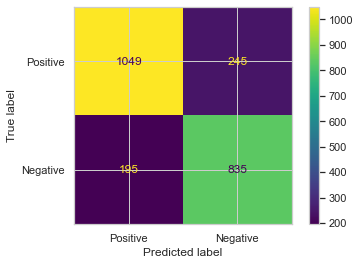

In [163]:
grid_rfc_recall = recall_score(y_test, y_pred)
grid_rfc_precision = precision_score(y_test, y_pred)
grid_rfc_f1 = f1_score(y_test, y_pred)
grid_rfc_accuracy = accuracy_score(y_test, y_pred)
grid_rfc_roc_auc = roc_auc_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# sns.heatmap(conf_matrix, annot=True)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=['Positive', 'Negative'])

plt.show()


In [164]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1294
           1       0.77      0.81      0.79      1030

    accuracy                           0.81      2324
   macro avg       0.81      0.81      0.81      2324
weighted avg       0.81      0.81      0.81      2324



In [165]:
# 6.2.3 K-Fold Cross-validation

score2 = cross_val_score(grid_cv_rfc, X_train, y_train, cv=5, scoring='recall')

grid_cv_score_mean = score2.mean()
grid_cv_stdev = stdev(score2)

print('Cross Validation Recall Scores: {}'.format(score2))
print('Average Cross Validation Recall score: ', grid_cv_score_mean)
print('Cross Validation Recall Standard Deviation: ', grid_cv_stdev)


Cross Validation Recall Scores: [0.83713355 0.80750408 0.82899023 0.82410423 0.81433225]
Average Cross Validation Recall score:  0.822412867777949
Cross Validation Recall Standard Deviation:  0.011730188781117187


In [166]:
cv_rfc_df2 = [(grid_rfc_recall, grid_rfc_precision, grid_rfc_f1,
               grid_rfc_accuracy, grid_rfc_roc_auc, grid_cv_score_mean, grid_cv_stdev)]

grid_rfc_score_df2 = pd.DataFrame(data=cv_rfc_df2, columns=[
    'Recall', 'Precision', 'F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])

grid_rfc_score_df2.insert(0, 'Model', 'Random Forest after HyperParamTuning')
grid_rfc_score_df2


Model   Recall  Precision  F1 Score  \
0  Random Forest after HyperParamTuning  0.81068   0.773148  0.791469   

   Accuracy  ROC-AUC Score  Avg CV Recall  Standard Deviation of CV Recall  
0  0.810671       0.810672       0.822413                          0.01173

In [ ]:
# Summary
# ...

In [167]:
# 7.3 Adding another classifier - XGBoost

# Boosting technique

from xgboost import XGBClassifier
# from src import XGBClassifier

xgbc = XGBClassifier()

xgbc.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [168]:
y_pred = xgbc.predict(X_test)
y_pred[:11]


array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

[[1085  209]
 [ 216  814]]


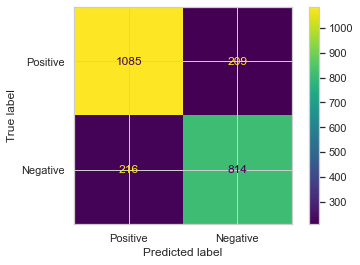

In [169]:
xgbc_recall = recall_score(y_test, y_pred)
xgbc_precision = precision_score(y_test, y_pred)
xgbc_accuracy = accuracy_score(y_test, y_pred)
xgbc_f1 = f1_score(y_test, y_pred)
xgbc_roc_auc = roc_auc_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# sns.heatmap(conf_matrix, annot=True)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=['Positive', 'Negative'])
plt.show()


In [170]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1294
           1       0.80      0.79      0.79      1030

    accuracy                           0.82      2324
   macro avg       0.81      0.81      0.81      2324
weighted avg       0.82      0.82      0.82      2324



In [171]:
# 6.3.1 K-fold validation

cv_score = cross_val_score(xgbc, X_train, y_train)

xgbc_cv_score_mean = cv_score.mean()
xgbc_cv_stdev = stdev(cv_score)

print('Cross Validation Recall scores are: {}'.format(cv_score))
print('Average Cross Validation Recall score: ', xgbc_cv_score_mean)
print('Cross Validation Recall standard deviation: ', xgbc_cv_stdev)


Cross Validation Recall scores are: [0.8407781  0.80100937 0.81182408 0.81398702 0.8111031 ]
Average Cross Validation Recall score:  0.8157403348092311
Cross Validation Recall standard deviation:  0.014864436779760933


In [172]:
cv_df = [(xgbc_recall, xgbc_precision, xgbc_f1, xgbc_accuracy,
          xgbc_roc_auc, xgbc_cv_score_mean, xgbc_cv_stdev)]

xgbc_score_df = pd.DataFrame(data=cv_df, columns=[
                             'Recall', 'Precision', 'F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])

xgbc_score_df.insert(0, 'Model', 'Cross Gradient Boosting Classifier')

xgbc_score_df


Model    Recall  Precision  F1 Score  \
0  Cross Gradient Boosting Classifier  0.790291   0.795699  0.792986   

   Accuracy  ROC-AUC Score  Avg CV Recall  Standard Deviation of CV Recall  
0  0.817126       0.814388        0.81574                         0.014864

In [ ]:
# # Interpretation after adding XGBoost Clasifier:
# Summary ...

# XGBoost is usually very efficient. Scores that we received from the algorithm tells us that we should probably change something more radically to get better results e.g. introduce oversampling and/or undersampling techniques.
# Recall score is better: 0,81 (was: ).
# Avg CV Recall is the same: 0.81.
# Standard Deviation of CV Recall is 0.01.
# ROC-AUC Score is the same: 0.8.
# Accuracy is worse: 0.78 (was: ).
# Precision: is much worse: 0.59 (was: ).
# F1 Score is the same: 0.8.


In [173]:
# 6.3.2 Hyperparameter Tuning Using GridSearchCV

# Step 1: Searching for the optimum parameters for the learning rate and the number of estimators:
params = {
    'learning_rate': [0.01],  # [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'n_estimators': [450]  # range(50,500,50),
}

grid_xgbc = GridSearchCV(xgbc, param_grid=params,
                         scoring="recall", cv=5).fit(X_train, y_train)


In [174]:
print("XGBC Best params: ", grid_xgbc.best_params_)

print("XGBC Best score: ", grid_xgbc.best_score_)


XGBC Best params:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'n_estimators': 450, 'subsample': 0.8}
XGBC Best score:  0.8165496755955386


In [196]:
# # Step 2: Searching for the optimum parameters for max_depth and min_child_weight:
# #! v1
# params = {
#     'max_depth': [2], # range(1, 5, 1)
#     'learning_rate': [0.05], # np.arange(0.01, 0.1, 0.01)
#     'subsample': [0.3], # np.arange(0.1, 1, 0.1)
#     'colsample_bytree': [0.9],
#     'min_child_weight': [7], # range (1, 7)
#     'n_estimators': [450],
# }


# grid_xgbc = GridSearchCV(xgbc, param_grid=params,
#                          scoring='recall', cv=5).fit(X_train, y_train)


In [198]:

# # ! v2

params = {
    'max_depth': [2],  
    'learning_rate': [0.05],
    'subsample': [0.3],
    'colsample_bytree': [0.9],
    'min_child_weight': [7],
    'n_estimators': [450],
}


grid_xgbc = GridSearchCV(xgbc, param_grid=params,
                         scoring='recall', cv=5).fit(X_train, y_train)


In [199]:
print("XGBC Best params: ", grid_xgbc.best_params_)

print("XGBC Best score: ", grid_xgbc.best_score_)


XGBC Best params:  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 7, 'n_estimators': 450, 'subsample': 0.3}
XGBC Best score:  0.8224165874032234


In [200]:
y_pred = xgbc.predict(X_test)
y_pred[:11]


array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

[[1085  209]
 [ 216  814]]


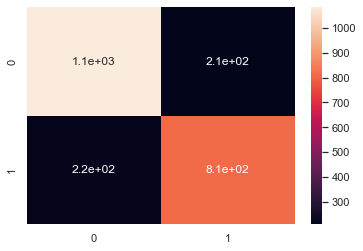

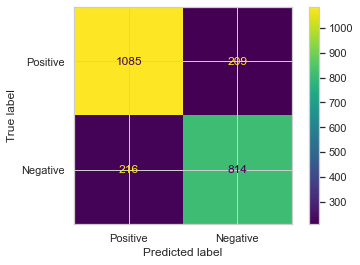

In [201]:
grid_xgbc_recall = recall_score(y_test, y_pred)
grid_xgbc_precision = precision_score(y_test, y_pred)
grid_xgbc_f1 = f1_score(y_test, y_pred)
grid_xgbc_accuracy = accuracy_score(y_test, y_pred)

grid_xgbc_roc_auc = roc_auc_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=['Positive', 'Negative'])
plt.show()


In [202]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1294
           1       0.80      0.79      0.79      1030

    accuracy                           0.82      2324
   macro avg       0.81      0.81      0.81      2324
weighted avg       0.82      0.82      0.82      2324



In [203]:
# 6.3.3  K-fold Cross Validation


cv_score2 = cross_val_score(grid_xgbc, X_train, y_train, scoring='recall',
                            cv=5, error_score='raise')

grid_xgbc_cv_score_mean = cv_score2.mean()
grid_xgbc_cv_stdev = stdev(cv_score2)

print('Cross Validation Recall scores are: {}'.format(cv_score2))
print('Average Cross Validation Recall score: ', grid_xgbc_cv_score_mean)
print('Cross Validation Recall standard deviation: ', grid_xgbc_cv_stdev)


Cross Validation Recall scores are: [0.84364821 0.81892333 0.81921824 0.81921824 0.81107492]
Average Cross Validation Recall score:  0.8224165874032234
Cross Validation Recall standard deviation:  0.012370093835079204


In [204]:
cv_df = [(grid_xgbc_recall, grid_xgbc_precision, grid_xgbc_f1, grid_xgbc_accuracy,
          grid_xgbc_roc_auc, grid_xgbc_cv_score_mean, grid_xgbc_cv_stdev)]

grid_xgbc_score_df = pd.DataFrame(data=cv_df, columns=[
    'Recall', 'Precision', 'F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])

grid_xgbc_score_df.insert(0, 'Model', 'XGBC after HyperParamTuning')
grid_xgbc_score_df


Model    Recall  Precision  F1 Score  Accuracy  \
0  XGBC after HyperParamTuning  0.790291   0.795699  0.792986  0.817126   

   ROC-AUC Score  Avg CV Recall  Standard Deviation of CV Recall  
0       0.814388       0.822417                          0.01237

In [205]:
# Summary
# ...

In [206]:
# 6.4 Voting Clasifier

from src import AdaBoostClassifier
from src import BaggingClassifier
from src import BernoulliNB
from src import CalibratedClassifierCV
from src import CategoricalNB
from src import ClassifierChain
from src import ComplementNB
from src import DecisionTreeClassifier
from src import DummyClassifier
from src import ExtraTreeClassifier
from src import ExtraTreesClassifier
from src import GaussianNB
from src import GaussianProcessClassifier
from src import GradientBoostingClassifier
from src import HistGradientBoostingClassifier
from src import KNeighborsClassifier
from src import LabelPropagation
from src import LabelSpreading
from src import LinearDiscriminantAnalysis
from src import LinearSVC
from src import LogisticRegression
from src import LogisticRegressionCV
from src import MLPClassifier
from src import MultiOutputClassifier
from src import MultinomialNB
from src import NearestCentroid
from src import NuSVC
from src import OneVsOneClassifier
from src import OneVsRestClassifier
from src import OutputCodeClassifier
from src import PassiveAggressiveClassifier
from src import Perceptron
from src import QuadraticDiscriminantAnalysis
from src import RadiusNeighborsClassifier
from src import RandomForestClassifier
from src import RidgeClassifier
from src import RidgeClassifierCV
from src import SGDClassifier
from src import SVC
from src import StackingClassifier
from src import VotingClassifier



In [207]:
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=12)))
estimators.append(('Bagging Classifier', BaggingClassifier(random_state=12)))
estimators.append(('Bernoulli NB', BernoulliNB()))
estimators.append(('Decision Tree Classifier',
                  DecisionTreeClassifier(random_state=12)))
estimators.append(('Dummy Classifier', DummyClassifier(random_state=12)))
estimators.append(
    ('Extra Tree Classifier', ExtraTreeClassifier(random_state=12)))
estimators.append(
    ('Extra Trees Classifier', ExtraTreesClassifier(random_state=12)))
estimators.append(('Gaussian NB', GaussianNB()))
estimators.append(('Gaussian Process Classifier',
                  GaussianProcessClassifier(random_state=12)))
estimators.append(('Gradient Boosting Classifier',
                  GradientBoostingClassifier(random_state=12)))
estimators.append(('Hist Gradient Boosting Classifier',
                  HistGradientBoostingClassifier(random_state=12)))
estimators.append(('KNN', KNeighborsClassifier()))
estimators.append(('Label Propagation', LabelPropagation()))
estimators.append(('Label Spreading', LabelSpreading()))
estimators.append(
    ('LogisticRegression', LogisticRegression(max_iter=1000, random_state=12)))
estimators.append(('Logistic Regression CV',
                  LogisticRegressionCV(max_iter=1000, random_state=12)))
estimators.append(
    ('MLPClassifier', MLPClassifier(max_iter=2000, random_state=12)))
estimators.append(('Nearest Centroid', NearestCentroid()))
estimators.append(('Passive Aggressive Classifier',
                  PassiveAggressiveClassifier(random_state=12)))
estimators.append(('Perceptron', Perceptron(random_state=12)))
#estimators.append(('RadiusNeighborsClassifier', RadiusNeighborsClassifier(radius=3) ))
estimators.append(('RandomForest', RandomForestClassifier(
    max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=170, random_state=12)))
estimators.append(('Ridge Classifier', RidgeClassifier(random_state=12)))
estimators.append(('Ridge Classifier CV', RidgeClassifierCV()))
estimators.append(('SGDClassifier', SGDClassifier(random_state=12)))
estimators.append(('SVC', SVC(random_state=12)))
estimators.append(('XGB', XGBClassifier(random_state=12)))


In [208]:
import warnings

vc_hard = VotingClassifier(estimators=estimators, voting='hard')
vc_hard.fit(X_train, y_train)
y_pred = vc_hard.predict(X_test)

warnings.filterwarnings('ignore')


[[1065  229]
 [ 217  813]]


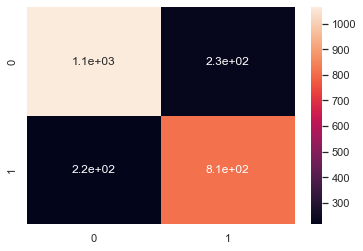

In [220]:
vc_hard_recall = recall_score(y_test, y_pred)
vc_hard_precision = precision_score(y_test, y_pred)
vc_hard_f1 = f1_score(y_test, y_pred)
vc_hard_accuracy = accuracy_score(y_test, y_pred)

vc_hard_roc_auc = roc_auc_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True)
print(conf_matrix)


# ConfusionMatrixDisplay.from_predictions(
#     y_test, y_pred, display_labels=['Positive', 'Negative'])
# plt.show()


In [210]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1294
           1       0.78      0.79      0.78      1030

    accuracy                           0.81      2324
   macro avg       0.81      0.81      0.81      2324
weighted avg       0.81      0.81      0.81      2324



In [211]:
# 6.4.1  K-Fold Cross-validation

vc_hard_score = cross_val_score(
    vc_hard, X_train, y_train, scoring='recall', cv=5, error_score='raise')

vc_hard_cv_score_mean = vc_hard_score.mean()
vc_hard_cv_stdev = stdev(vc_hard_score)

print('Cross Validation Recall Scores are: {}'.format(vc_hard_score))
print('Average Cross Validation Recall Score: ', vc_hard_cv_score_mean)
print('Cross Validation Recall Standard Deviation: ', vc_hard_cv_stdev)


Cross Validation Recall Scores are: [0.82736156 0.80097879 0.80944625 0.8029316  0.79641694]
Average Cross Validation Recall Score:  0.8074270289227433
Cross Validation Recall Standard Deviation:  0.012087945488873323


In [212]:
cv_df = [(vc_hard_recall, vc_hard_precision, vc_hard_f1, vc_hard_accuracy,
          vc_hard_roc_auc, vc_hard_cv_score_mean, vc_hard_cv_stdev)]

vc_hard_score_df = pd.DataFrame(cv_df, columns=[
                                'Recall', 'Precision', 'F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])

vc_hard_score_df.insert(0, 'Model', 'Voting Classifier(Hard Voting)')
vc_hard_score_df


Model   Recall  Precision  F1 Score  Accuracy  \
0  Voting Classifier(Hard Voting)  0.78932    0.78023  0.784749   0.80809   

   ROC-AUC Score  Avg CV Recall  Standard Deviation of CV Recall  
0       0.806175       0.807427                         0.012088

In [213]:
# Summarizing

In [214]:
# 7. Result comparison

predictions = pd.concat([rfc_score_df, grid_rfc_score_df2, xgbc_score_df,
                        grid_xgbc_score_df, vc_hard_score_df], ignore_index=True, sort=False)

predictions.sort_values(by=['Avg CV Recall'], ascending=False)


Model    Recall  Precision  F1 Score  \
3           XGBC after HyperParamTuning  0.790291   0.795699  0.792986   
1  Random Forest after HyperParamTuning  0.810680   0.773148  0.791469   
2    Cross Gradient Boosting Classifier  0.790291   0.795699  0.792986   
4        Voting Classifier(Hard Voting)  0.789320   0.780230  0.784749   
0                         Random Forest  0.763107   0.778989  0.770966   

   Accuracy  ROC-AUC Score  Avg CV Recall  Standard Deviation of CV Recall  
3  0.817126       0.814388       0.822417                         0.012370  
1  0.810671       0.810672       0.822413                         0.011730  
2  0.817126       0.814388       0.815740                         0.014864  
4  0.808090       0.806175       0.807427                         0.012088  
0  0.799053       0.795386       0.777786                         0.018405

In [215]:
# Results 
# Summary...

In [216]:
# 8.1 AUC-ROC Curve for the best algorithm

# ! ROC => The curve plots the possible True Positive rates (TPR)(y axis) against the False Positive rates (FPR)(x axis).


# ! ROC AUC score shows how well the classifier distinguishes positive and negative classes. It can take values from 0 to 1.

# ! A higher ROC AUC indicates better performance. A perfect model would have an AUC of 1, while a random model would have an AUC of 0.5.


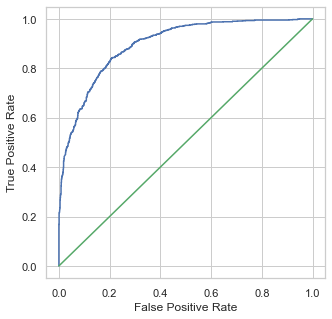

In [221]:
from src import RocCurveDisplay
from src import roc_curve

y_proba = grid_xgbc.predict_proba(X_test)
# y_proba


def plot_roc_auc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5, 5)

    plt.plot([0, 1], [0, 1], color='g')


plot_roc_auc_curve(y_test, y_proba[:, 1])


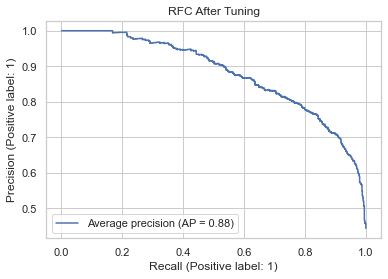

In [222]:
# 8.2 Precision-Recall Curve (PR curve) for the best algorithm

# The precision-recall curve shows the tradeoff between precision and recalls for different thresholds.

from src import precision_recall_curve
from src import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(grid_xgbc, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("RFC After Tuning")


In [219]:
# Results

# as a result we can say that we can predict Customer Churn with the 79% of the recall(avg cv recall 83%) and precision(avg precision 88%)
# with only 0.01 average recall standard deviation
